In [194]:
import numpy as np
import seaborn as sns
import pandas as pd
import datetime
import sys
import multiprocessing
from glob import glob
from collections import Counter
import gensim
from scipy import spatial
from gensim.models.doc2vec import Doc2Vec, LabeledSentence
import matplotlib.pyplot as plt
# plt.rc('font',family='Times New Roman')
# from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
import statsmodels.formula.api as smf
from scipy.stats import chisquare
from scipy import stats
pd.set_option('display.max_columns',None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',1000)

def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()

TaggededDocument = gensim.models.doc2vec.TaggedDocument

In [195]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()

### observed-expected

In [3]:
random=pd.read_csv('rg_random.csv',index_col=0) #maxmin
random1=pd.read_csv('rg_random1.csv',index_col=0) #radius

In [4]:
random_a=pd.read_csv('/Users/xuhuimin/mobile/rg_random_radius.csv',index_col=0) #radius
random_a1=pd.read_csv('/Users/xuhuimin/mobile/rg_random.csv',index_col=0)#maxmin

In [5]:
random_pc=pd.read_csv('/Users/xuhuimin/mobile/rg_random_pc.csv',index_col=0)

In [3]:
info=pd.read_csv('info_all.csv')

In [5]:
info.columns

Index(['tag', 'history', 'romance', 'fiction', 'computer_science', 'social_science', 'non_native_lang', 'children_book', 'literature_art', 'fantasy', 'life', 'economic_management', 'business', 'science_tech', 'magazine', 'love_sex', 'uid', 'mb', 'pricesum', 'all', 'fee', 'entertainment', 'science', 'literature', 'business_', 'life_', 'radius', 'distance1', 'maxmin'], dtype='object')

In [4]:
info_a=pd.read_csv('/Users/xuhuimin/mobile/info_all.csv')

In [7]:
info[['radius','maxmin']].corr()

,radius,maxmin
radius,1.000000,0.001549
maxmin,0.001549,1.000000


In [6]:
info_a[['radius','maxmin']].corr()

,radius,maxmin
radius,1.000000,-0.130783
maxmin,-0.130783,1.000000


In [5]:
info_pc=pd.read_csv('/Users/xuhuimin/mobile/data_sum.csv')

In [8]:
Counter(info_a['mb'].values)

Counter({0: 45539, 1: 24835, 2: 29626})

In [9]:
45539/100000

0.45539

In [7]:
Counter(info_a['operation_sys'].values)

Counter({'IOS': 24835,
         nan: 18930,
         'SYMBIAN': 7549,
         'ANDROID': 45539,
         'WINDOWS PHONE': 1753,
         'BLACKBERRY': 266,
         'BABA': 141,
         'WINDOWS MOBILE': 224,
         'OPHONE': 196,
         'MTK': 346,
         'LINUX': 65,
         'RTK': 32,
         'NUCLEUS': 64,
         'THREADX': 23,
         'WINDOWS CE': 29,
         'BREW MOBILE PLATFORM': 1,
         'PRIVATE': 1,
         'PALM': 2,
         'NEWPLUS': 1,
         'OSE': 3})

In [9]:
random_pc['1']=random_pc['1'].apply(lambda x: eval(x) if x!='04BDB6B53A9CACC5F6876E84F90B4F7C' else np.nan)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


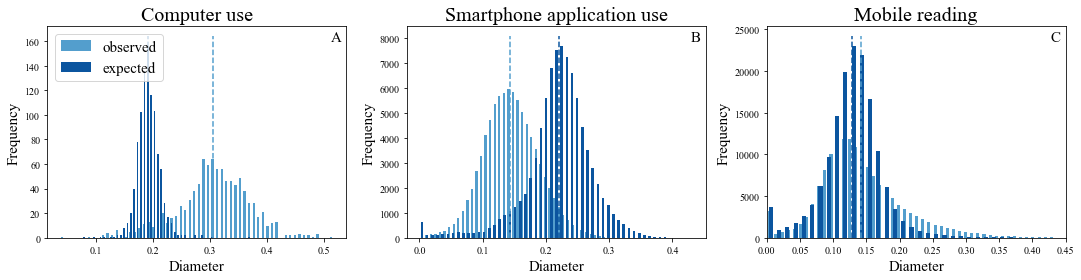

In [16]:
fig = plt.figure(figsize=(15,4),facecolor = 'white')

ax=fig.add_subplot(1,3,1)
ax.hist(info_pc['maxmin'].values,bins=60,rwidth=0.5,color=sns.color_palette("Blues")[3],label='observed')
ax.hist(random_pc['0'].values,bins=50,rwidth=0.5,color=sns.color_palette("Blues")[5],label='expected')
a=ax.get_ylim()[1]
mean1=info_pc['maxmin'].mean()
mean2=random_pc['0'].mean()
plt.plot([mean1,mean1],[0,a],color=sns.color_palette("Blues")[3],linestyle="--")
plt.plot([mean2,mean2],[0,a],color=sns.color_palette("Blues")[5],linestyle="--")
ax.set_xlabel('Diameter',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.text(0.95, 0.98,'A',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=15)


plt.title('Computer use',fontsize=20)
plt.legend(fontsize=15,loc='upper left')

ax=fig.add_subplot(1,3,2)
ax.hist(info_a['maxmin'].values,bins=60,rwidth=0.5,color=sns.color_palette("Blues")[3],label='observed')
ax.hist(random_a1['0'].values,bins=50,rwidth=0.5,color=sns.color_palette("Blues")[5],label='expected')
a=ax.get_ylim()[1]
mean1=info_a['maxmin'].mean()
mean2=random_a1['0'].mean()
plt.plot([mean1,mean1],[0,a],color=sns.color_palette("Blues")[3],linestyle="--")
plt.plot([mean2,mean2],[0,a],color=sns.color_palette("Blues")[5],linestyle="--")
ax.set_xlabel('Diameter',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.text(0.95, 0.98,'B',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=15)


plt.title('Smartphone application use',fontsize=20)
# plt.legend(fontsize=15,loc='upper left')

ax=fig.add_subplot(1,3,3)
ax.hist(info['maxmin'].values,bins=60,rwidth=0.5,color=sns.color_palette("Blues")[3],label='observed')
ax.hist(random['0'].values,bins=50,rwidth=0.5,color=sns.color_palette("Blues")[5],label='expected')
a=ax.get_ylim()[1]
mean1=info['maxmin'].mean()
mean2=random.mean()
plt.plot([mean1,mean1],[0,a],color=sns.color_palette("Blues")[3],linestyle="--")
plt.plot([mean2,mean2],[0,a],color=sns.color_palette("Blues")[5],linestyle="--")
ax.set_xlabel('Diameter',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.text(0.95, 0.98,'C',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=15)
plt.xlim([0,0.45])

plt.title('Mobile reading',fontsize=20)
# plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig('./picture/observed-expected.jpg',dpi=300)
plt.show()

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


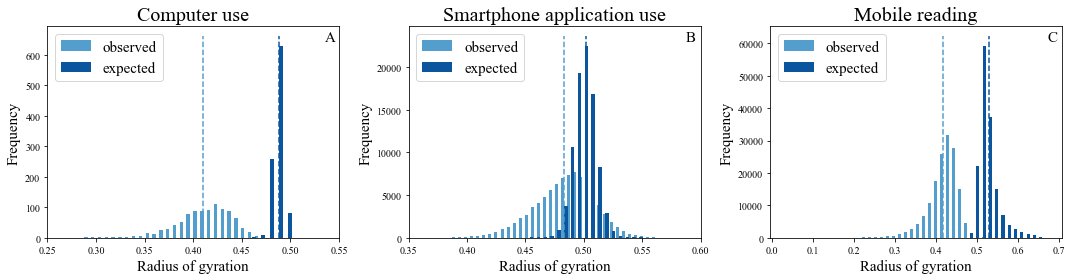

In [42]:
fig = plt.figure(figsize=(15,4),facecolor = 'white')

ax=fig.add_subplot(1,3,1)
ax.hist(info_pc['radius'].values,bins=35,rwidth=0.5,color=sns.color_palette("Blues")[3],label='observed')
ax.hist(random_pc['1'].values,bins=5,rwidth=0.5,color=sns.color_palette("Blues")[5],label='expected')
a=ax.get_ylim()[1]
mean1=info_pc['radius'].mean()
mean2=random_pc['1'].mean()
plt.plot([mean1,mean1],[0,a],color=sns.color_palette("Blues")[3],linestyle="--")
plt.plot([mean2,mean2],[0,a],color=sns.color_palette("Blues")[5],linestyle="--")
ax.set_xlabel('Radius of gyration',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.text(0.95, 0.98,'A',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=15)
plt.xlim([0.25,0.55])
plt.title('Computer use',fontsize=20)
plt.legend(fontsize=15,loc='upper left')



ax=fig.add_subplot(1,3,2)
ax.hist(info_a[(info_a['radius']!=0)&(info_a['radius'].notnull())]['radius'].values,bins=60,rwidth=0.5,color=sns.color_palette("Blues")[3],label='observed')
ax.hist(random_a[(random_a['0']!=0)&(random_a['0'].notnull())]['0'].values,bins=70,rwidth=0.5,color=sns.color_palette("Blues")[5],label='expected')
a=ax.get_ylim()[1]
mean1=info_a[(info_a['radius']!=0)&(info_a['radius'].notnull())]['radius'].mean()
mean2=random_a[(random_a['0']!=0)&(random_a['0'].notnull())]['0'].mean()
plt.plot([mean1,mean1],[0,a],color=sns.color_palette("Blues")[3],linestyle="--")
plt.plot([mean2,mean2],[0,a],color=sns.color_palette("Blues")[5],linestyle="--")
ax.set_xlabel('Radius of gyration',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.text(0.95, 0.98,'B',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=15)

plt.xlim([0.35,0.6])
plt.title('Smartphone application use',fontsize=20)
plt.legend(fontsize=15,loc='upper left')

ax=fig.add_subplot(1,3,3)
ax.hist(info[(info['distance1']!=0)&(info['distance1'].notnull())]['distance1'].values,bins=40,rwidth=0.5,color=sns.color_palette("Blues")[3],label='observed')
ax.hist(random1[(random1['0']!=0)&(random1['0'].notnull())]['0'].values,bins=28,rwidth=0.5,color=sns.color_palette("Blues")[5],label='expected')
a=ax.get_ylim()[1]
mean1=info[(info['distance1']!=0)&(info['distance1'].notnull())]['distance1'].mean()
mean2=random1[(random1['0']!=0)&(random1['0'].notnull())]['0'].mean()
plt.plot([mean1,mean1],[0,a],color=sns.color_palette("Blues")[3],linestyle="--")
plt.plot([mean2,mean2],[0,a],color=sns.color_palette("Blues")[5],linestyle="--")
ax.set_xlabel('Radius of gyration',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.text(0.95, 0.98,'C',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=15)

plt.title('Mobile reading',fontsize=20)
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('./picture/observed-expected.jpg',dpi=300)
plt.show()

In [23]:
info_pc[(info_pc['radius']!=0)&(info_pc['radius'].notnull())]['radius'].mean(),info_pc[(info_pc['radius']!=0)&(info_pc['radius'].notnull())]['radius'].std()

(0.4103818809272191, 0.02926855796243601)

In [24]:
info_a[(info_a['radius']!=0)&(info_a['radius'].notnull())]['radius'].mean(),info_a[(info_a['radius']!=0)&(info_a['radius'].notnull())]['radius'].std()

(0.4832299957099373, 0.025843004309178262)

In [25]:
info[(info['radius']!=0)&(info['radius'].notnull())]['radius'].mean(),info[(info['radius']!=0)&(info['radius'].notnull())]['radius'].std()

(0.41668151076458265, 0.03846300995691349)

In [30]:
info_pc['maxmin'].mean(),info_pc['maxmin'].std()

(0.30485104556671444, 0.06391675897390402)

In [31]:
info_a['maxmin'].mean(),info_a['maxmin'].std()

(0.14333668470042613, 0.045154961342890834)

In [32]:
info['maxmin'].mean(),info['maxmin'].std()

(0.14170737478776066, 0.06476105930229797)

In [43]:
stats.ttest_ind(info_pc[(info_pc['radius']!=0)&(info_pc['radius'].notnull())]['radius'],random_pc[(random_pc['1']!=0)&(random_pc['1'].notnull())]['1'])

Ttest_indResult(statistic=-82.46964855220979, pvalue=0.0)

In [6]:
stats.ttest_ind(info_a[(info_a['radius']!=0)&(info_a['radius'].notnull())]['radius'],random_a[(random_a['0']!=0)&(random_a['0'].notnull())]['0'])

Ttest_indResult(statistic=-203.18587986544244, pvalue=0.0)

In [7]:
stats.ttest_ind(info[(info['radius']!=0)&(info['radius'].notnull())]['radius'],random[(random['0']!=0)&(random['0'].notnull())]['0'])

Ttest_indResult(statistic=-965.498607049047, pvalue=0.0)

### distribution-information cocoon

In [4]:
info=pd.read_csv('info_all.csv')

In [4]:
def cal(x):
    x=eval(x)
    if x==1:
        return np.nan
    else:
        a=np.sqrt(np.sum([i**2/len(x) for i in x]))
        return a

In [5]:
for i in ['history', 'romance', 'fiction', 'computer_science', 'social_science', 'non_native_lang', 'children_book', 'literature_art', 'fantasy', 'life', 'economic_management', 'business', 'science_tech', 'magazine', 'love_sex']:
    print(i)
    info[i+'_s']=info[i].apply(lambda x: cal(x))

history
romance
fiction
computer_science
social_science
non_native_lang
children_book
literature_art
fantasy
life
economic_management
business
science_tech
magazine
love_sex


In [6]:
# info_=info[['history_s', 'romance_s', 'fiction_s', 'computer_science_s', 'social_science_s', 'non_native_lang_s', 'children_book_s', 'literature_art_s', 'fantasy_s', 'life_s', 'economic_management_s', 'business_s', 'science_tech_s', 'magazine_s', 'love_sex_s']]

In [7]:
# info_.to_csv('./reading.csv',index=False)

In [320]:
a = pd.melt(info_, value_name="all")

In [321]:
c=a.groupby(['variable'])['all'].mean().keys()
d=a.groupby(['variable'])['all'].mean().values
e=[i[0] for i in sorted(list(zip(c,d)),key=lambda x: x[1],reverse=False)]

In [8]:
info_a=pd.read_csv('/Users/xuhuimin/mobile/info_all.csv')

In [9]:
for i in ['navigation', 'news', 'real_state', 'recruitment', 'search', 'payment', 'travel', 'game', 'service', 'shopping', 'communication', 'forum', 'web_browse', 'video', 'software_tool', 'mail', 'reading', 'music']:
    print(i)
    info_a[i+'_s']=info_a[i].apply(lambda x: cal(x))

navigation
news
real_state
recruitment
search
payment
travel
game
service
shopping
communication
forum
web_browse
video
software_tool
mail
reading
music


In [10]:
info_a_=info_a[[ 'navigation_s', 'news_s', 'real_state_s', 'recruitment_s', 'search_s', 'payment_s', 'travel_s', 'game_s', 'service_s', 'shopping_s', 'communication_s', 'forum_s', 'web_browse_s', 'video_s', 'software_tool_s', 'mail_s', 'reading_s', 'music_s']]

In [11]:
info_a_.to_csv('./app.csv',index=False)

In [326]:
a_a = pd.melt(info_a_, value_name="all")

In [327]:
c_a=a_a.groupby(['variable'])['all'].mean().keys()
d_a=a_a.groupby(['variable'])['all'].mean().values
e_a=[i[0] for i in sorted(list(zip(c_a,d_a)),key=lambda x: x[1],reverse=False)]

In [329]:
m1=['News', 'Video', 'Communication', 'Web Browsing', 'Search', 'Music', 'Weather Service', 'Software Management', 'Forum', 'Shopping', 'Navigation', 'Reading', 'Game', 'Payment', 'Travel', 'Mail', 'Real State', 'Recruitment']
m2=['Fiction', 'Romance', 'Fantasy', 'Literature & Art', 'Business & Leadership', 'Social Science', 'History & Biographies', 'Economics & Management', 'Family Life', "Children's books", 'Magazines', 'Computer Science', 'Science & Technology', 'Love, Sex & Marriage', 'Non-native Languages']

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


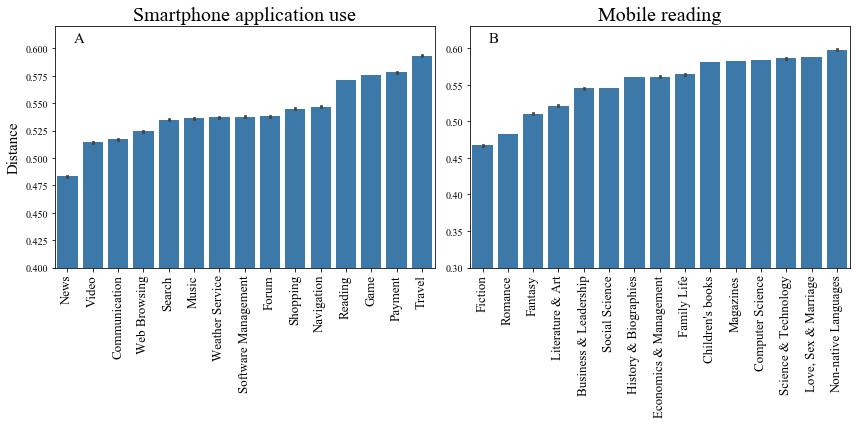

In [330]:
fig = plt.figure(figsize=(12, 6),facecolor='white')
ax=fig.add_subplot(1,2,1)
ax=sns.barplot(x="variable", y="all", data=a_a, order=e_a[:15], color=sns.color_palette("Blues")[4],estimator=np.mean, ci=95)
ax.set_xticklabels(m1, rotation=90, fontsize=13)
ax.set_ylabel('Distance',fontsize=15)
ax.set_xlabel(None)
ax.text(0.05, 0.98,'A',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=15)

plt.ylim([0.4,0.62])
plt.title('Smartphone application use',fontsize=20)

ax=fig.add_subplot(1,2,2)
plt.ylim([0.3,0.63])
ax=sns.barplot(x="variable", y="all", data=a, order=e[:15], color=sns.color_palette("Blues")[4],estimator=np.mean, ci=95)
ax.set_xticklabels(m2, rotation=90, fontsize=13)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.text(0.05, 0.98,'B',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=15)

plt.title('Mobile reading',fontsize=20)
plt.tight_layout()
plt.savefig('./picture/distribution_info_cocoon.jpg',dpi=300)
plt.show()

### maxmin-regression

#### reading

In [7]:
allusers=pd.read_csv('./all_userbooks_info.csv')

In [3]:
info=pd.read_csv('info_all.csv')

In [17]:
info=info[np.isnan(info['maxmin_nonent'])==False]

In [13]:
info['maxmin_nonent']=info['maxmin_nonent'].replace(np.nan,0)

In [129]:
# info.to_csv('info_all.csv',index=False)

In [49]:
# def real(x):
#     a=allusers[allusers['uid']==x]
#     type_num=len(Counter(a['category'].values))
#     type_num_nonent=len([i for i in Counter(a['category'].values).keys() if i not in ['小说','原创女频','原创男频']])
#     entertainment_ratio=(a[(a['category']=='小说') | (a['category']=='原创女频') | (a['category']=='原创女频')]['duration'].sum())/a['duration'].sum()
#     return type_num,type_num_nonent,entertainment_ratio

In [56]:
# info['real']=info['uid'].apply(lambda x: real(x))
# info['type_num']=info['real'].apply(lambda x: x[0])
# info['type_num_nonent']=info['real'].apply(lambda x: x[1])
# info['entertainment_ratio']=info['real'].apply(lambda x: x[2])

In [18]:
info[['radius_nonent','maxmin_nonent','type_num']].corr()

,radius_nonent,maxmin_nonent,type_num
radius_nonent,1.000000,-0.317291,0.091912
maxmin_nonent,-0.317291,1.000000,0.513088
type_num,0.091912,0.513088,1.000000


In [157]:
reg = smf.ols('type_num_nonent ~ entertainment_ratio',
               data = info).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        type_num_nonent   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     5818.
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:32:07   Log-Likelihood:            -3.6923e+05
No. Observations:              156977   AIC:                         7.385e+05
Df Residuals:                  156975   BIC:                         7.385e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.1252      0.013    250.009      0.000       3.101       3.150
entertainment_ratio    -1.1990      0.016    -76.273      0.000      -1.230      -1.168
==============================================================================
Omnibus:                    22113.856   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32625.876
Skew:                           1.083   Prob(JB):                         0.00
Kurtosis:                       3.546   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# def maxmin_nonent(x):
#     try:
#         a=[]
#         for i in x:
#             if eval(i)!=1:
#                 a.extend(eval(i))
#         return np.max(a)-np.min(a)
#     except:
#         return np.nan

In [102]:
# info['maxmin_nonent']=info.apply(lambda x: maxmin_nonent(list(x[1:2])+list(x[4:9])+list(x[10:16])),axis=1)

In [110]:
# def radius_nonent(x):
#     try:
#         a=[]
#         for i in x:
#             if eval(i)!=1:
#                 a.extend(eval(i))
#         return np.sqrt(np.sum([i**2/len(a) for i in a]))
#     except:
#         return np.nan

In [111]:
# info['radius_nonent']=info.apply(lambda x: radius_nonent(list(x[1:2])+list(x[4:9])+list(x[10:16])),axis=1)

In [25]:
# def maxmin(x):
#     try:
#         a=[]
#         for i in x:
#             if eval(i)!=1:
#                 a.extend(eval(i))
#         return np.max(a)-np.min(a)
#     except:
#         return np.nan
#         pass

In [28]:
# info['maxmin']=info.apply(lambda x: maxmin(x[1:16]),axis=1)

In [135]:
info['maxmin_p']=info['maxmin'].rank(pct=True,method='first')
info['radius_p']=info['radius'].rank(pct=True,method='first')
info['maxmin_nonent_p']=info['maxmin_nonent'].rank(pct=True,method='first')
info['radius_nonent_p']=info['radius_nonent'].rank(pct=True,method='first')

In [161]:
reg = smf.ols('radius_nonent ~ fee+type_num_nonent',
               data = info).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          radius_nonent   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                 5.012e+04
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:38:20   Log-Likelihood:                 63886.
No. Observations:              158258   AIC:                        -1.278e+05
Df Residuals:                  158255   BIC:                        -1.277e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1649      0.001    286.465      0.000       0.164       0.166
fee                 0.0070      0.001      7.189      0.000       0.005       0.009
type_num_nonent     0.0496      0.000    314.964      0.000       0.049       0.050
==============================================================================
Omnibus:                     1017.916   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15154.931
Skew:                           0.198   Prob(JB):                         0.00
Kurtosis:                       1.537   Cond. No.                         8.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
reg = smf.ols('maxmin_nonent ~ fee+type_num_nonent',
               data = info).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          maxmin_nonent   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 3.464e+04
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:42:40   Log-Likelihood:             1.4421e+05
No. Observations:              103591   AIC:                        -2.884e+05
Df Residuals:                  103588   BIC:                        -2.884e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0180      0.000     53.486      0.000       0.017       0.019
fee                 0.0026      0.000      5.875      0.000       0.002       0.003
type_num_nonent     0.0199   7.59e-05    262.322      0.000       0.020       0.020
==============================================================================
Omnibus:                    30142.336   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89363.281
Skew:                           1.523   Prob(JB):                         0.00
Kurtosis:                       6.379   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# def game_min(x):
#     try:
#         a=[]
#         for i in x:
#             if eval(i)!=1:
#                 a.extend(eval(i))
#         return np.min(a)
#     except:
#         return np.nan
#         pass

In [65]:
# info['game_min']=info.apply(lambda x: game_min(x[['romance','fantasy','fiction']]),axis=1)

In [66]:
# info['game_min_p']=info['game_min'].rank(pct=True,method='first')

In [67]:
# def entertainment_rank(x):
#     if x<=0.25:
#         return 1
#     if 0.25<x<=0.5:
#         return 2
#     if 0.5<x<=0.75:
#         return 3
#     if 0.75<x<=1:
#         return 4
#     if np.isnan(x)==True:
#         return 5

In [69]:
# info['game_min_rank']=info['game_min_p'].apply(lambda x: entertainment_rank(x))

In [178]:
reg = smf.ols('game_min_p ~ fee+entertainment_ratio',
               data = info).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             game_min_p   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     3696.
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:42:47   Log-Likelihood:                -22616.
No. Observations:              148679   AIC:                         4.524e+04
Df Residuals:                  148676   BIC:                         4.527e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.3849      0.002    247.478      0.000       0.382       0.388
fee                     0.0094      0.002      5.413      0.000       0.006       0.013
entertainment_ratio     0.1595      0.002     85.747      0.000       0.156       0.163
==============================================================================
Omnibus:                    29544.937   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5984.342
Skew:                           0.074   Prob(JB):                         0.00
Kurtosis:                       2.028   Cond. No.                         4.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### reading1

In [140]:
freq=pd.read_csv('freq_07_05.csv')

In [141]:
freq.columns=['uid','duration_freq','time_freq']

In [142]:
freq['duration_freq']=freq['duration_freq'].apply(lambda x: eval(x))
freq['time_freq']=freq['time_freq'].apply(lambda x: eval(x))

In [143]:
radius=pd.read_csv('rg_07_05.csv')
radius['1']=radius['1'].apply(lambda x: eval(x))

In [144]:
freq['raw']=radius['1'].values

In [145]:
def freq_duration(x):
#     x={key:val for key, val in x.items() if key != 'nan'} 
    type_num=len([i for i in x if i])
    type_num_nonent=len([i for i in x.keys() if i not in ['原创女频','原创男频','小说']])
    entertainment_ratio=np.sum([x[i] for i in x if i in  ['原创女频','原创男频','小说']])/np.sum([i for i in x.values()])
    return type_num,type_num_nonent,entertainment_ratio

In [146]:
freq['freq_duration']=freq['duration_freq'].apply(lambda x: freq_duration(x))
freq['type_num']=freq['freq_duration'].apply(lambda x: x[0])
freq['type_num_nonent']=freq['freq_duration'].apply(lambda x: x[1])
freq['entertainment_ratio']=freq['freq_duration'].apply(lambda x: x[2])

In [147]:
def freq_time(x):
#     x={key:val for key, val in x.items() if key != 'nan'} 
    type_num=len(x)
    type_num_nonent=len([i for i in x.keys() if i not in ['原创女频','原创男频','小说']])
    entertainment_ratio=np.sum([x[i] for i in x if i in  ['原创女频','原创男频','小说']])/np.sum([i for i in x.values()])
    return type_num,type_num_nonent,entertainment_ratio

In [148]:
freq['freq_time']=freq['time_freq'].apply(lambda x: freq_time(x))

In [149]:
freq['entertainment_ratio1']=freq['freq_time'].apply(lambda x: x[2])

In [150]:
def maxmin(x):
    try:
        new_names=['历史传记','原创女频','小说','计算机','社会科学','外文','亲子少儿','文学艺术','原创男频','生活','经济管理',
               '成功励志','科技','期刊','两性情感','nan']
        a=[]
        for i in new_names:
            if x[i]!=1:
                a.extend(x[i])
#         a=[i for i in a if i>0.05]
        return np.max(a)-np.min(a)
    except:
        return 0

In [151]:
def radius(x):
#     try:
        new_names=['历史传记','原创女频','小说','计算机','社会科学','外文','亲子少儿','文学艺术','原创男频','生活','经济管理',
               '成功励志','科技','期刊','两性情感','nan']
        a=[]
        for i in new_names:
            if x[i]!=1:
                a.extend(x[i])
#         a=[i for i in a if i>0.05]
        return np.sqrt(np.sum([i**2/len(a) for i in a]))
#     except:
#         return np.nan

In [152]:
freq['maxmin']=freq['raw'].apply(lambda x: maxmin(x))
freq['radius']=freq['raw'].apply(lambda x: radius(x))

In [153]:
def maxmin_nonent(x):
    try:
        new_names=['历史传记','计算机','社会科学','外文','亲子少儿','文学艺术','生活','经济管理',
               '成功励志','科技','期刊','两性情感','nan']
        a=[]
        for i in new_names:
            if x[i]!=1:
                a.extend(x[i])
#         a=[i for i in a if i>0.05]
        return np.max(a)-np.min(a)
    except:
        return 0

In [154]:
freq['maxmin_nonent']=freq['raw'].apply(lambda x: maxmin_nonent(x))

In [155]:
def radius_nonent(x):
    try:
        new_names=['历史传记','计算机','社会科学','外文','亲子少儿','文学艺术','生活','经济管理',
               '成功励志','科技','期刊','两性情感','nan']
        a=[]
        for i in new_names:
            if x[i]!=1:
                a.extend(x[i])
#         a=[i for i in a if i>0.05]
        return np.sqrt(np.sum([i**2/len(a) for i in a]))
    except:
        return np.nan

In [156]:
freq['radius_nonent']=freq['raw'].apply(lambda x: radius_nonent(x))

In [157]:
def game_min(x):
    try:
        new_names=['原创女频','原创男频','小说']
        a=[]
        for i in new_names:
            if x[i]!=1:
                a.extend(x[i])
        return np.max(a)-np.min(a)
    except:
        np.nan

In [158]:
freq['game_min']=freq['raw'].apply(lambda x: game_min(x))
freq['game_min']=freq['game_min']/freq['maxmin']
freq['game_min_p']=freq['game_min'].rank(pct=True,method='first')

In [159]:
def entertainment_rank(x):
    if x<=0.25:
        return 1
    if 0.25<x<=0.5:
        return 2
    if 0.5<x<=0.75:
        return 3
    if 0.75<x<=1:
        return 4
    if np.isnan(x)==True:
        return 5

In [160]:
freq['game_min_rank']=freq['game_min_p'].apply(lambda x: entertainment_rank(x))

In [161]:
Counter(freq['game_min_rank'].values)

Counter({1: 36838, 2: 36838, 3: 36838, 4: 36838, 5: 12021})

In [162]:
# purchase=pd.read_csv('./purchase.csv')
# def pay_num(x):
#     a=purchase[purchase['uid']==x]
#     return len(set(a['bookid'].values))
# freq['pay_num']=freq['uid'].apply(lambda x: pay_num(x))
# voucher=pd.read_csv('./voucher.csv')
# def voucher_num(x):
#     a=voucher[voucher['uid']==x]
#     return len(set(a['bookid'].values))
# freq['voucher_num']=freq['uid'].apply(lambda x: voucher_num(x))
# freq['pay_voucher']=freq['pay_num']+freq['voucher_num']
# def read_num(x):
#     try:
#         new_names=['历史传记','原创女频','小说','计算机','社会科学','外文','亲子少儿','文学艺术','原创男频','生活','经济管理',
#                '成功励志','科技','期刊','两性情感','nan']
#         a=[]
#         for i in new_names:
#             if x[i]!=1:
#                 a.extend(x[i])
#         return len(set(a))
#     except:
#         return 0
# freq['read_num']=freq['raw'].apply(lambda x: read_num(eval(x)))
# freq['pay_ratio']=freq['pay_voucher']/freq['read_num']
# freq['pay_ratio']=freq['pay_ratio'].replace(np.nan,0)
# freq['pay_ratio']=freq['pay_ratio'].replace(float('inf'),0)

In [192]:
purchase=pd.read_csv('./purchase.csv')
book_table=pd.read_csv('./book_table.csv')
diction=dict(book_table[['bookid','category']].values)
purchase['category']=purchase['bookid'].apply(lambda x: diction[x] if x in diction else np.nan)

In [193]:
purchase.head()

,bookname,bookid,uid,date,price,category
0,秀色锦园之最强农家女,31027f67ce2f0066f53322ba,1.865646e+09,20161001.0,6.97,原创女频
1,暖妻成瘾,34d0f4af25c52cc58ad6be71,9.944218e+08,20161001.0,1.11,原创女频
2,被遗忘的时光,cd85d2c765ce050877321369,2.645515e+09,20161001.0,1.00,小说
3,军婚难耐,87972e2eba0d4a7303763a54,2.569947e+09,20161001.0,0.86,原创女频
4,一品医妃,78fb82d3eefdc8d377ee32c0,2.732712e+09,20161001.0,0.43,原创女频


In [218]:
def pay_nonent(x):
    a=purchase[purchase['uid']==x]
    a=a[(a['category']!='原创女频')&(a['category']!='原创男频')&(a['category']!='小说')]
    return a['price'].sum()

In [219]:
freq['pay_nonent']=freq['uid'].apply(lambda x: pay_nonent(x))

In [222]:
len(freq[freq['pay_nonent']!=0])

13373

In [164]:
freq[['maxmin','radius','game_min_rank','type_num','entertainment_ratio']].corr()

,maxmin,radius,game_min_rank,type_num,entertainment_ratio
maxmin,1.000000,0.051283,-0.423076,0.285395,-0.329274
radius,0.051283,1.000000,-0.214140,0.235498,0.221193
game_min_rank,-0.423076,-0.214140,1.000000,-0.448316,0.238317
type_num,0.285395,0.235498,-0.448316,1.000000,-0.328643
entertainment_ratio,-0.329274,0.221193,0.238317,-0.328643,1.000000


In [165]:
users=pd.read_csv('./user_table.csv')

In [166]:
diction=dict(users[['uid','pricesum']].values)
freq['pricesum']=freq['uid'].apply(lambda x: diction[x] if x in diction else np.nan)

In [167]:
diction=dict(users[['uid','platform']].values)
freq['platform']=freq['uid'].apply(lambda x: diction[x] if x in diction else np.nan)

In [168]:
len(users[np.isnan(users['pricesum'])==True])

122572

In [169]:
Counter(users['platform'].values)

Counter({1: 625, 2: 37819, 3: 120439})

In [170]:
def mb(x):
    if x==1:
        return 1
    if x==2:
        return 1
    if x==3:
        return 0
    else:
        return x

In [171]:
freq['mb']=freq['platform'].apply(lambda x: mb(x))

In [172]:
freq['fee']=freq['pricesum'].apply(lambda x: 1 if np.isnan(x)==False else 0)

In [173]:
# freq.groupby(['type_num_nonent','fee'])['maxmin_nonent'].count()
# freq.groupby(['type_num_nonent','fee'])['maxmin_nonent'].mean()

In [174]:
freq.to_csv('freq.csv',index=False)

In [175]:
# freq=pd.read_csv('freq.csv')

In [176]:
freq['price_p']=freq['pricesum'].rank(pct=True,method='first')

In [177]:
def price(x):
    if x<=0.50:
        return 2
    if 0.51<x<=1:
        return 3
#     if 0.5<x<=0.75:
#         return 4
#     if 0.75<x<=1:
#         return 5
    if np.isnan(x)==True:
        return 1

In [178]:
freq['price_rank']=freq['price_p'].apply(lambda x: price(x))

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


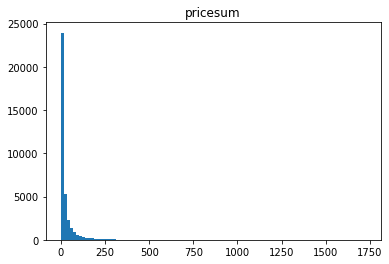

In [179]:
plt.hist(freq['pricesum'].values,bins=100)
plt.title('pricesum')
plt.show()

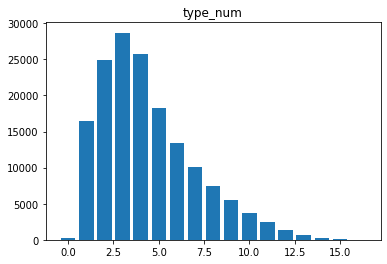

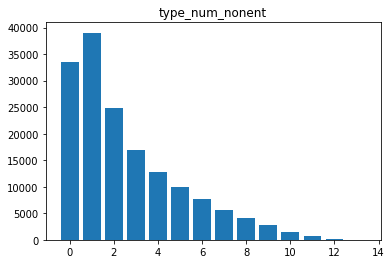

In [180]:
plt.bar(Counter(freq['type_num'].values).keys(),Counter(freq['type_num'].values).values())
plt.title('type_num')
plt.show()
plt.bar(Counter(freq['type_num_nonent'].values).keys(),Counter(freq['type_num_nonent'].values).values())
plt.title('type_num_nonent')
plt.show()

In [181]:
freq['radius_nonent_p']=freq['radius_nonent'].rank(pct=True,method='first')
freq['radius_p']=freq['radius'].rank(pct=True,method='first')
freq['maxmin_nonent_p']=freq['maxmin_nonent'].rank(pct=True,method='first')
freq['maxmin_p']=freq['maxmin'].rank(pct=True,method='first')

In [182]:
freq['pricesum']=freq['pricesum'].replace(np.nan,0)

In [236]:
freq1=freq[freq['maxmin_nonent']!=0]

In [256]:
reg = smf.ols('maxmin_nonent ~ game_min_rank',
               data = freq).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          maxmin_nonent   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                 5.452e+04
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:41:03   Log-Likelihood:             1.6178e+05
No. Observations:              159373   AIC:                        -3.235e+05
Df Residuals:                  159371   BIC:                        -3.235e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1943      0.001    375.823      0.000       0.193       0.195
game_min_rank    -0.0407      0.000   -233.484      0.000      -0.041      -0.040
==============================================================================
Omnibus:                    43848.838   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126138.597
Skew:                           1.450   Prob(JB):                         0.00
Kurtosis:                       6.254   Cond. No.                         7.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
reg = smf.ols('type_num_nonent~fee',
               data = freq).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        type_num_nonent   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2069.
Date:                Mon, 06 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:53:36   Log-Likelihood:            -3.7143e+05
No. Observations:              159373   AIC:                         7.429e+05
Df Residuals:                  159371   BIC:                         7.429e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4050      0.007    339.055      0.000       2.391       2.419
fee            0.6760      0.015     45.489      0.000       0.647       0.705
==============================================================================
Omnibus:                    24794.577   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38080.422
Skew:                           1.137   Prob(JB):                         0.00
Kurtosis:                       3.750   Cond. No.                         2.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
reg = smf.ols('entertainment_ratio~fee+mb',
               data = freq).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     entertainment_ratio   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     147.1
Date:                 Mon, 06 Jul 2020   Prob (F-statistic):           1.47e-64
Time:                         12:53:38   Log-Likelihood:                -48273.
No. Observations:               158763   AIC:                         9.655e+04
Df Residuals:                   158760   BIC:                         9.658e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8047      0.001    752.743      0.000       0.803       0.807
fee           -0.0204      0.002    -10.372      0.000      -0.024      -0.017
mb            -0.0284      0.002    -14.675      0.000      -0.032      -0.025
==============================================================================
Omnibus:                    36127.172   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66217.702
Skew:                          -1.529   Prob(JB):                         0.00
Kurtosis:                       3.813   Cond. No.                         2.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
reg = smf.ols('type_num_nonent~ entertainment_ratio',
               data = freq).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        type_num_nonent   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                 4.802e+04
Date:                Mon, 06 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:53:38   Log-Likelihood:            -3.5097e+05
No. Observations:              159160   AIC:                         7.019e+05
Df Residuals:                  159158   BIC:                         7.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.4510      0.014    381.620      0.000       5.423       5.479
entertainment_ratio    -3.6511      0.017   -219.135      0.000      -3.684      -3.618
==============================================================================
Omnibus:                    22086.852   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33682.916
Skew:                           1.002   Prob(JB):                         0.00
Kurtosis:                       4.032   Cond. No.                         5.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [254]:
reg = smf.ols('radius~ fee+type_num',
               data = freq).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 radius   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     4789.
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:55:24   Log-Likelihood:             1.6889e+05
No. Observations:              159373   AIC:                        -3.378e+05
Df Residuals:                  159370   BIC:                        -3.377e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3694      0.000    888.813      0.000       0.369       0.370
fee            0.0073      0.001     14.413      0.000       0.006       0.008
type_num       0.0076   8.06e-05     94.166      0.000       0.007       0.008
==============================================================================
Omnibus:                    91567.742   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           772964.070
Skew:                          -2.713   Prob(JB):                         0.00
Kurtosis:                      12.325   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
freq['maxmin_nonent'].describe()

count    159373.000000
mean          0.085031
std           0.101580
min           0.000000
25%           0.000000
50%           0.053287
75%           0.137767
max           0.593494
Name: maxmin_nonent, dtype: float64

In [250]:
freq1['maxmin_nonent'].describe()

count    99845.000000
mean         0.135726
std          0.097927
min          0.000003
25%          0.063129
50%          0.113769
75%          0.185109
max          0.593494
Name: maxmin_nonent, dtype: float64

In [248]:
freq['entertainment_ratio1'].describe()

count    159160.000000
mean          0.791523
std           0.325456
min           0.000000
25%           0.743050
50%           0.968339
75%           0.999501
max           1.000000
Name: entertainment_ratio1, dtype: float64

In [245]:
freq['type_num'].describe()

count    159373.000000
mean          4.398662
std           2.626180
min           0.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          16.000000
Name: type_num, dtype: float64

In [243]:
freq['game_min'].describe()

count    147352.000000
mean          0.792720
std           0.296608
min           0.000000
25%           0.645275
50%           0.988733
75%           1.000000
max           1.000000
Name: game_min, dtype: float64

In [253]:
reg = smf.ols('maxmin_nonent_p ~ pay_nonent+type_num',
               data = freq).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        maxmin_nonent_p   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                 6.675e+04
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:55:09   Log-Likelihood:                 20360.
No. Observations:              159373   AIC:                        -4.071e+04
Df Residuals:                  159370   BIC:                        -4.068e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1740      0.001    166.825      0.000       0.172       0.176
pay_nonent     0.0002   4.19e-05      5.668      0.000       0.000       0.000
type_num       0.0740      0.000    360.970      0.000       0.074       0.074
==============================================================================
Omnibus:                     6630.594   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7494.410
Skew:                           0.530   Prob(JB):                         0.00
Kurtosis:                       3.064   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


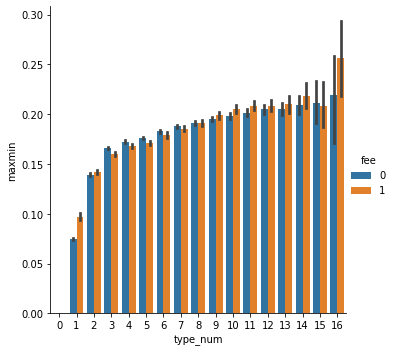

In [89]:
sns.catplot(x="type_num", y="maxmin", hue="fee", kind="bar", data=freq)
plt.show()
# sns.catplot(x="type_num_nonent", y="radius_nonent", hue="fee", kind="bar", data=freq)
# plt.show()
# sns.catplot(x="type_num_nonent", y="maxmin", hue="fee", kind="bar", data=freq)
# plt.show()
# sns.catplot(x="type_num_nonent", y="radius", hue="fee", kind="bar", data=freq)
# plt.show()

In [255]:
reg = smf.ols('game_min_rank ~ fee+entertainment_ratio',
               data = freq).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          game_min_rank   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     4897.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:22:23   Log-Likelihood:            -2.5782e+05
No. Observations:              159160   AIC:                         5.156e+05
Df Residuals:                  159157   BIC:                         5.157e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.9917      0.008    244.145      0.000       1.976       2.008
fee                    -0.1027      0.007    -14.060      0.000      -0.117      -0.088
entertainment_ratio     0.9066      0.009     97.674      0.000       0.888       0.925
==============================================================================
Omnibus:                     6607.388   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7032.106
Skew:                           0.493   Prob(JB):                         0.00
Kurtosis:                       2.702   Cond. No.                         5.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### case

In [164]:
purchase=pd.read_csv('./purchase.csv')

In [60]:
np.max(purchase.groupby(['uid'])['price'].sum().values)

1723.690000000002

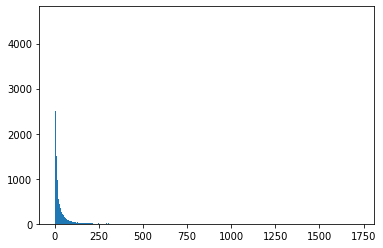

In [58]:
plt.hist(purchase.groupby(['uid'])['price'].sum().values,bins=1000)
plt.show()

In [137]:
book_table=pd.read_csv('./book_table.csv')
diction=dict(book_table[['bookid','category']].values)
purchase['category']=purchase['bookid'].apply(lambda x: diction[x] if x in diction else np.nan)

In [35]:
Counter(purchase['category'].values)

Counter({'原创女频': 110807,
         '小说': 64459,
         '文学艺术': 8112,
         '经济管理': 8344,
         '原创男频': 47287,
         '计算机': 1449,
         nan: 7590,
         '科技': 1211,
         '历史传记': 4114,
         '社会科学': 6792,
         '生活': 3692,
         '成功励志': 8780,
         '亲子少儿': 933,
         '两性情感': 849,
         '期刊': 300,
         '外文': 52})

#### mobile

In [72]:
# from urlparse import urlparse
 
# # clean url
# def urlclean(url):
#     try:
#         url = urlparse(url).hostname
#         if url.replace('.','').isdigit(): return 'none'
#         else:
#             if len(url.split('.')) >=2 :
#                 if url[-6:]=='com.cn': return '.'.join(url.split('.')[-3:])
#                 return '.'.join(url.split('.')[-2:])
#     except:
#         return 'none'

In [49]:
info_a=pd.read_csv('/Users/xuhuimin/mobile/info_all.csv')

In [3]:
freq=pd.read_csv('./freq.csv')

In [42]:
freq['id']=freq['freq'].apply(lambda x: int(eval(x.split(',')[0][1:])))

In [43]:
freq['type_num']=freq['freq'].apply(lambda x: len([i for i in x.split('(')[1].split(')')[0][1:].split(',') if '-9' not in i]))


In [44]:
def non_entertain(x):
    y=len([i for i in x.split('(')[1].split(')')[0][1:].split(',') if '-9' not in i])
    x=[i.split(':') for i in x.split('(')[1].split(')')[0][:-1].split(',')]
    a=[]
    for i in ['视频','音乐','游戏']:
        for j in x:
            if i in j[0]:
                a.append(int(j[1][1:]))
    return y-len(a)  

In [45]:
freq['type_num_nonent']=freq['freq'].apply(lambda x:  non_entertain(x))

In [46]:
freq['all_freq']=freq['freq'].apply(lambda x: np.sum([int(i.split(':')[1][1:]) for i in x.split('(')[1].split(')')[0][:-1].split(',') if '-9' not in i]))

In [47]:
def entertain(x):
    x=[i.split(':') for i in x.split('(')[1].split(')')[0][:-1].split(',')]
    a=[]
    for i in ['视频','音乐','游戏']:
        for j in x:
            if i in j[0]:
                a.append(int(j[1][1:]))
    return np.sum(a)  

In [48]:
freq['entertainment_freq']=freq['freq'].apply(lambda x: entertain(x))

In [49]:
freq['entertainment_ratio']=freq['entertainment_freq']/freq['all_freq']

In [50]:
# freq['entertainment_ratio1']=(freq['entertainment_freq']*31)/(freq['all_freq']*freq['day'])

In [51]:
# freq['day']=freq['freq'].apply(lambda x: int(x.split(',')[-1][1:-1]))

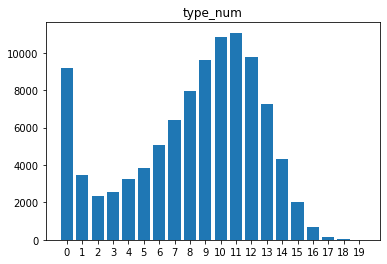

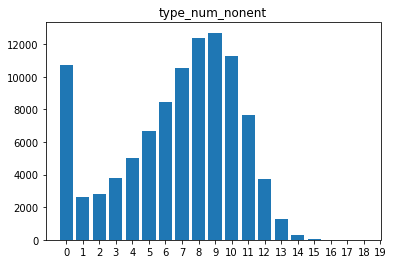

In [52]:
plt.bar(Counter(freq['type_num'].values).keys(),Counter(freq['type_num'].values).values())
plt.title('type_num')
plt.xticks(range(0,20,1))
plt.show()
plt.bar(Counter(freq['type_num_nonent'].values).keys(),Counter(freq['type_num_nonent'].values).values())
plt.title('type_num_nonent')
plt.xticks(range(0,20,1))
plt.show()

In [53]:
diction=dict(freq[['id','type_num_nonent']].values)

In [54]:
info_a['type_num_nonent']=info_a['uid'].apply(lambda x: diction[x] if x in diction else np.nan)

In [55]:
diction=dict(freq[['id','entertainment_ratio']].values)

In [56]:
info_a['entertainment_ratio']=info_a['uid'].apply(lambda x: diction[x] if x in diction else np.nan)

In [57]:
# def maxmin(x):
#     try:
#         a=[]
#         for i in x:
#             if eval(i)!=1:
#                 a.extend(eval(i))
#         if np.max(a)-np.min(a)==0:
#             return np.max(a)
#         else:
#             return np.max(a)-np.min(a)
#     except:
#         return np.nan
#         pass

In [58]:
# info_a['maxmin']=info_a.apply(lambda x: maxmin(list(x[1:18])),axis=1)

In [69]:
info_a1=info_a[info_a['maxmin']!=0]

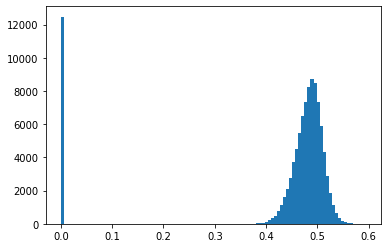

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


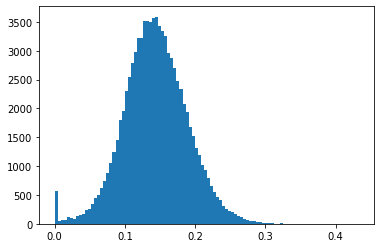

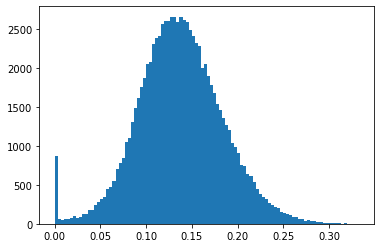

In [61]:
plt.hist(info_a['radius'],bins=100)
plt.show()
plt.hist(info_a['maxmin'],bins=100)
plt.show()
plt.hist(info_a['maxmin_nonent'],bins=100)
plt.show()

In [67]:
info_a['maxmin_p']=info_a['maxmin'].rank(pct=True,method='first')
info_a['radius_p']=info_a['radius'].rank(pct=True,method='first')
info_a['maxmin_nonent_p']=info_a['maxmin_nonent'].rank(pct=True,method='first')

In [27]:
# info_a.sort_values(['maxmin'],ascending=True)

In [71]:
reg = smf.ols('all_freq ~ radius',
               data = info_a1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               all_freq   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     5032.
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:03:09   Log-Likelihood:            -9.5362e+05
No. Observations:               99494   AIC:                         1.907e+06
Df Residuals:                   99492   BIC:                         1.907e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -136.8627     31.201     -4.386      0.000    -198.017     -75.708
radius      4889.3286     68.923     70.939      0.000    4754.240    5024.417
==============================================================================
Omnibus:                   122927.468   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32117712.934
Skew:                           6.538   Prob(JB):                         0.00
Kurtosis:                      90.043   Cond. No.                         7.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
info_a['all_freq'].describe()

count    100000.000000
mean       1920.511020
std        3599.603756
min           0.000000
25%         127.000000
50%         748.000000
75%        2205.000000
max      123658.000000
Name: all_freq, dtype: float64

In [97]:
# info_a.to_csv('/Users/xuhuimin/mobile/info_all.csv',index=False)

In [4]:
info_a.columns

Index(['tag', 'navigation', 'news', 'real_state', 'recruitment', 'search', 'payment', 'travel', 'game', 'service', 'shopping', 'communication', 'forum', 'web_browse', 'video', 'software_tool', 'mail', 'reading', 'music', 'uid', 'sex', 'age', 'fees', 'terminal_price', 'operation_sys', 'house_price', 'mb', 'travel_', 'search_', 'social_', 'entertainmemt_', 'reading_', 'tool_', 'payment_', 'radius', 'maxmin', 'maxmin_nonent', 'freq1', 'freq2', 'freq3', 'freq4', 'freq5', 'freq6', 'freq7', 'freq8', 'freq9', 'freq10', 'freq11', 'freq12', 'freq13', 'freq14', 'freq15', 'freq16', 'freq17', 'freq18', 'all_freq', 'entertainment_ratio', 'type_num'], dtype='object')

In [94]:
def chain(x):
    try:
        a=[]
        for i in x:
            if eval(i)!=1:
                a.extend(eval(i))
        return np.max(a)-np.min(a)
    except:
        return np.nan
        pass

In [96]:
info_a['maxmin_nonent']=info_a.apply(lambda x: chain(list(x[1:8])+list(x[9:14])+list(x[15:18])),axis=1)

In [26]:
info_a['radius1'].values[0]

0.49391668671858463

In [25]:
info_a['radius1']=info_a['radius_again'].apply(lambda x: x[0] if type(x)!=float else np.nan)
info_a['maxmin1']=info_a['radius_again'].apply(lambda x: x[1] if type(x)!=float else np.nan)

In [47]:
info_a[['maxmin_nonent','radius','game_min']].corr()

,maxmin_nonent,radius,game_min
maxmin_nonent,1.000000,-0.127939,-0.290940
radius,-0.127939,1.000000,-0.714218
game_min,-0.290940,-0.714218,1.000000


#### mobile1

In [96]:
freq=pd.read_csv('./freq_06_13.csv')

In [6]:
freq.head()

,0,1
0,107099800,Counter({'nan': 117})
1,39268662,"Counter({'社交沟通': 1128, '其他资讯': 493, '搜索': 441, '社区论坛': 394, 'nan': 137, '软件工具': 99, '网页浏览': 58, '音乐': 41, '应用商店': 14, '视频': 4, '生活服务': 1, '电商购物': 1})"
2,35783987,"Counter({'社交沟通': 3413, 'nan': 957, '搜索': 707, '位置': 423, '其他资讯': 236, '视频': 76, '软件工具': 25, '音乐': 8, '邮箱': 2, '应用商店': 1, '社区论坛': 1})"
3,60108403,Counter()
4,49331784,"Counter({'社交沟通': 3210, 'nan': 1822, '其他资讯': 951, '应用商店': 541, '搜索': 146, '软件工具': 88, '视频': 79, '社区论坛': 14, '位置': 11, '音乐': 8, '电商购物': 4})"


In [7]:
freq['1']=freq['1'].apply(lambda x: eval(x))

In [11]:
def freq_duration(x):
    x={key:val for key, val in x.items() if key != 'nan'} 
    type_num=len([i for i in x if i])
    type_num_nonent=len([i for i in x.keys() if i not in ['音乐','视频','游戏']])
    entertainment_ratio=np.sum([x[i] for i in x if i in  ['音乐','视频','游戏']])/np.sum([i for i in x.values()])
    all_freq=np.sum([i for i in x.values()])
    return type_num,type_num_nonent,entertainment_ratio,all_freq

In [12]:
freq['freq_duration']=freq['1'].apply(lambda x: freq_duration(x))
freq['type_num']=freq['freq_duration'].apply(lambda x: x[0])
freq['type_num_nonent']=freq['freq_duration'].apply(lambda x: x[1])
freq['entertainment_ratio']=freq['freq_duration'].apply(lambda x: x[2])
freq['all_freq']=freq['freq_duration'].apply(lambda x: x[3])

In [13]:
freq1=freq[freq['entertainment_ratio']!=0]

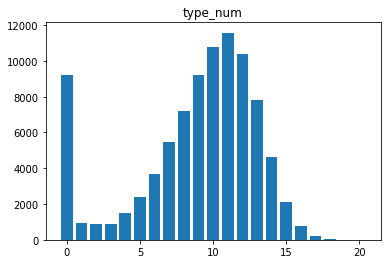

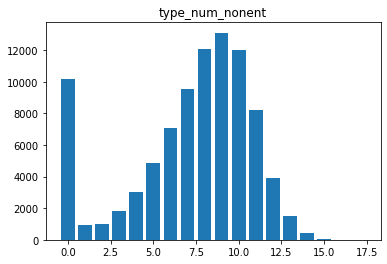

In [14]:
plt.bar(Counter(freq1['type_num'].values).keys(),Counter(freq1['type_num'].values).values())
plt.title('type_num')
plt.show()
plt.bar(Counter(freq1['type_num_nonent'].values).keys(),Counter(freq1['type_num_nonent'].values).values())
plt.title('type_num_nonent')
plt.show()

In [20]:
reg = smf.ols('type_num_nonent ~ entertainment_ratio',
               data = freq1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        type_num_nonent   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     6100.
Date:                Sat, 04 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:34:12   Log-Likelihood:            -1.9036e+05
No. Observations:               80544   AIC:                         3.807e+05
Df Residuals:                   80542   BIC:                         3.807e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.5440      0.011    797.098      0.000       8.523       8.565
entertainment_ratio    -4.6910      0.060    -78.102      0.000      -4.809      -4.573
==============================================================================
Omnibus:                     1547.660   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1606.070
Skew:                          -0.335   Prob(JB):                         0.00
Kurtosis:                       2.829   Cond. No.                         6.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
radius=pd.read_csv('rg_06_13.csv')
radius['1']=radius['1'].apply(lambda x: eval(x))

In [21]:
info_a=pd.read_csv('/Users/xuhuimin/mobile/info_all.csv')

In [22]:
data=info_a[['uid','sex','age','fees','terminal_price','operation_sys','house_price','mb']]

In [23]:
data['raw']=radius['1'].values

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
freq.columns=['uid', 'freq', 'freq_duration', 'type_num', 'type_num_nonent', 'entertainment_ratio', 'all_freq']

In [25]:
data=pd.merge(data,freq,on=['uid'])

In [26]:
len(data)

100000

In [86]:
# data.to_csv('mobile_app.csv',index=False)

In [27]:
def maxmin(x):
    try:
        new_names=['位置','其他资讯','房产','招聘','搜索','支付','旅游','游戏','生活服务','电商购物',
                         '社交沟通','社区论坛','网页浏览','视频','软件工具','邮箱','阅读','音乐','应用商店']
        a=[]
        for i in new_names:
            if x[i]!=1:
                a.extend(x[i])
        return np.max(a)-np.min(a)
    except:
        return 0

In [28]:
def radius(x):
#     try:
        new_names=['位置','其他资讯','房产','招聘','搜索','支付','旅游','游戏','生活服务','电商购物',
                         '社交沟通','社区论坛','网页浏览','视频','软件工具','邮箱','阅读','音乐','应用商店']
        a=[]
        for i in new_names:
            if x[i]!=1:
                a.extend(x[i])
        return np.sqrt(np.sum([i**2/len(a) for i in a]))
#     except:
#         return np.nan

In [29]:
data['maxmin']=data['raw'].apply(lambda x: maxmin(x))

In [30]:
data['radius']=data['raw'].apply(lambda x: radius(x))

In [31]:
def maxmin_nonent(x):
    try:
        new_names=['位置','其他资讯','房产','招聘','搜索','支付','旅游','生活服务','电商购物',
                         '社交沟通','社区论坛','网页浏览','软件工具','邮箱','阅读','应用商店']
        a=[]
        for i in new_names:
            if x[i]!=1:
                a.extend(x[i])
        return np.max(a)-np.min(a)
    except:
        return 0

In [32]:
data['maxmin_nonent']=data['raw'].apply(lambda x: maxmin_nonent(x))

In [33]:
def radius_nonent(x):
#     try:
        new_names=['位置','其他资讯','房产','招聘','搜索','支付','旅游','生活服务','电商购物',
                         '社交沟通','社区论坛','网页浏览','软件工具','邮箱','阅读','应用商店']
        a=[]
        for i in new_names:
            if x[i]!=1:
                a.extend(x[i])
        return np.sqrt(np.sum([i**2/len(a) for i in a]))
#     except:
#         return np.nan

In [34]:
data['radius_nonent']=data['raw'].apply(lambda x: radius_nonent(x))

In [35]:
def game_min(x):
    try:
        new_names=['游戏','音乐','视频']
        a=[]
        for i in new_names:
            if x[i]!=1:
                a.extend(x[i])
        return np.max(a)-np.min(a)
    except:
        np.nan

In [36]:
data['game_min']=data['raw'].apply(lambda x: game_min(x))
data['game_min']=data['game_min']/data['maxmin']
data['game_min_p']=data['game_min'].rank(pct=True,method='first')

In [37]:
def entertainment_rank(x):
    if x<=0.25:
        return 1
    if 0.25<x<=0.5:
        return 2
    if 0.5<x<=0.75:
        return 3
    if 0.75<x<=1:
        return 4
    if np.isnan(x)==True:
        return 5

In [38]:
data['game_min_rank']=data['game_min_p'].apply(lambda x: entertainment_rank(x))

In [88]:
data.to_csv('mobile_app1.csv',index=False)

In [97]:
data=pd.read_csv('mobile_app.csv')

In [126]:
data[['maxmin_nonent','radius_nonent','game_min_rank','type_num_nonent','entertainment_ratio']].corr()

,maxmin_nonent,radius_nonent,game_min_rank,type_num_nonent,entertainment_ratio
maxmin_nonent,1.000000,0.661690,-0.413024,0.621251,-0.065224
radius_nonent,0.661690,1.000000,-0.463824,0.750121,-0.046826
game_min_rank,-0.413024,-0.463824,1.000000,-0.343095,0.045636
type_num_nonent,0.621251,0.750121,-0.343095,1.000000,0.003546
entertainment_ratio,-0.065224,-0.046826,0.045636,0.003546,1.000000


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


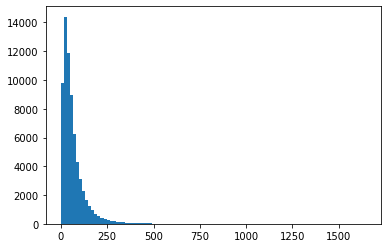

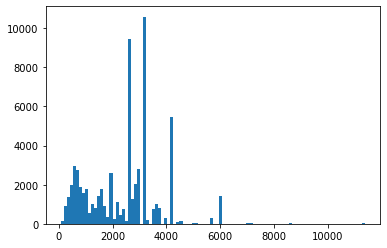

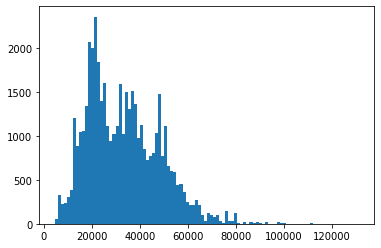

In [100]:
plt.hist(data['fees'],bins=100)
plt.show()
plt.hist(data['terminal_price'],bins=100)
plt.show()
plt.hist(data['house_price'],bins=100)
plt.show()

In [101]:
data['fees1']=data['fees'].apply(lambda x: np.log(x+0.1))
data['house_price1']=data['house_price'].apply(lambda x: np.log(x+0.1))
data['terminal_price1']=data['terminal_price'].apply(lambda x: np.log(x+0.1))

In [117]:
data['terminal_price2']=data['terminal_price'].apply(lambda x: x/1000)

In [102]:
for column in ['fees1','house_price1','age','terminal_price1']:
    mean_val = data[column].mean()
    data[column].fillna(mean_val, inplace=True)

In [103]:
data['mb']=data['mb'].apply(lambda x: 0 if x==2 else x)

In [257]:
reg = smf.ols('maxmin_nonent ~ game_min_rank',
               data = data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          maxmin_nonent   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                 2.057e+04
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:42:24   Log-Likelihood:             1.3594e+05
No. Observations:              100000   AIC:                        -2.719e+05
Df Residuals:                   99998   BIC:                        -2.719e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1971      0.000    427.696      0.000       0.196       0.198
game_min_rank    -0.0199      0.000   -143.412      0.000      -0.020      -0.020
==============================================================================
Omnibus:                     6535.625   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16678.508
Skew:                           0.386   Prob(JB):                         0.00
Kurtosis:                       4.846   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
reg = smf.ols('type_num_nonent ~ house_price1+sex+age',
               data = data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        type_num_nonent   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     303.8
Date:                Mon, 06 Jul 2020   Prob (F-statistic):          3.31e-196
Time:                        12:47:19   Log-Likelihood:            -2.3422e+05
No. Observations:               85879   AIC:                         4.684e+05
Df Residuals:                   85875   BIC:                         4.685e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.6384      0.409     23.556      0.000       8.836      10.440
house_price1     0.0737      0.039      1.906      0.057      -0.002       0.150
sex             -0.2202      0.031     -7.217      0.000      -0.280      -0.160
age             -0.0793      0.003    -28.440      0.000      -0.085      -0.074
==============================================================================
Omnibus:                     6134.135   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5845.023
Skew:                          -0.581   Prob(JB):                         0.00
Kurtosis:                       2.469   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
reg = smf.ols('type_num_nonent ~ entertainment_ratio',
               data = data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        type_num_nonent   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.215
Date:                Mon, 06 Jul 2020   Prob (F-statistic):              0.270
Time:                        12:47:22   Log-Likelihood:            -2.5617e+05
No. Observations:               96602   AIC:                         5.123e+05
Df Residuals:                   96600   BIC:                         5.124e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.1180      0.013    648.905      0.000       8.093       8.142
entertainment_ratio     0.1115      0.101      1.102      0.270      -0.087       0.310
==============================================================================
Omnibus:                     5959.338   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6555.798
Skew:                          -0.611   Prob(JB):                         0.00
Kurtosis:                       2.635   Cond. No.                         9.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
reg = smf.ols('entertainment_ratio ~ house_price1+sex+age',
               data = data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     entertainment_ratio   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     49.34
Date:                 Mon, 06 Jul 2020   Prob (F-statistic):           7.57e-32
Time:                         12:47:25   Log-Likelihood:                 63390.
No. Observations:                82835   AIC:                        -1.268e+05
Df Residuals:                    82831   BIC:                        -1.267e+05
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0922      0.013      7.368      0.000       0.068       0.117
house_price1    -0.0012      0.001     -1.011      0.312      -0.004       0.001
sex             -0.0089      0.001     -9.214      0.000      -0.011      -0.007
age             -0.0006   8.59e-05     -7.021      0.000      -0.001      -0.000
==============================================================================
Omnibus:                    84786.737   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4780425.235
Skew:                           5.209   Prob(JB):                         0.00
Kurtosis:                      38.728   Cond. No.                     1.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
data['radius_p']=data['radius'].rank(pct=True,method='first')
data['maxmin_p']=data['maxmin'].rank(pct=True,method='first')
data['maxmin_nonent_p']=data['maxmin_nonent'].rank(pct=True,method='first')
data['radius_nonent_p']=data['radius_nonent'].rank(pct=True,method='first')

In [136]:
reg = smf.ols('radius ~ house_price1+type_num+sex+age',
               data = data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 radius   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                 2.771e+04
Date:                Mon, 06 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:48:31   Log-Likelihood:                 81381.
No. Observations:               85879   AIC:                        -1.628e+05
Df Residuals:                   85874   BIC:                        -1.627e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1405      0.010     13.501      0.000       0.120       0.161
house_price1     0.0039      0.001      4.015      0.000       0.002       0.006
type_num         0.0239   7.25e-05    330.073      0.000       0.024       0.024
sex             -0.0148      0.001    -19.095      0.000      -0.016      -0.013
age              0.0002   7.11e-05      2.963      0.003    7.13e-05       0.000
==============================================================================
Omnibus:                     3693.352   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4185.476
Skew:                          -0.532   Prob(JB):                         0.00
Kurtosis:                       3.192   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [251]:
len(data)

100000

In [240]:
data['maxmin_nonent'].describe()

count    100000.000000
mean          0.137344
std           0.068231
min           0.000000
25%           0.112552
50%           0.141998
75%           0.172842
max           0.498894
Name: maxmin_nonent, dtype: float64

In [241]:
data['game_min'].describe()

count    79887.000000
mean         0.272824
std          0.201961
min          0.000000
25%          0.109135
50%          0.264216
75%          0.407355
max          1.000000
Name: game_min, dtype: float64

In [247]:
data['entertainment_ratio'].describe()

count    96602.000000
mean         0.058163
std          0.109086
min          0.000000
25%          0.003698
50%          0.024139
75%          0.066966
max          1.000000
Name: entertainment_ratio, dtype: float64

In [244]:
data['type_num'].describe()

count    100000.000000
mean          9.319430
std           4.391736
min           0.000000
25%           7.000000
50%          10.000000
75%          13.000000
max          21.000000
Name: type_num, dtype: float64

In [135]:
reg = smf.ols('maxmin_nonent_p ~ house_price1+type_num+sex+age',
               data = data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        maxmin_nonent_p   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                 1.016e+04
Date:                Mon, 06 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:48:16   Log-Likelihood:                 889.89
No. Observations:               85879   AIC:                            -1770.
Df Residuals:                   85874   BIC:                            -1723.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0664      0.027      2.500      0.012       0.014       0.119
house_price1     0.0066      0.003      2.639      0.008       0.002       0.012
type_num         0.0371      0.000    200.676      0.000       0.037       0.038
sex             -0.0056      0.002     -2.855      0.004      -0.010      -0.002
age              0.0007      0.000      3.661      0.000       0.000       0.001
==============================================================================
Omnibus:                     3569.124   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3929.373
Skew:                           0.512   Prob(JB):                         0.00
Kurtosis:                       2.777   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
reg = smf.ols('game_min_rank ~ house_price1+sex+age+entertainment_ratio',
               data = data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          game_min_rank   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     84.34
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.31e-71
Time:                        12:48:42   Log-Likelihood:            -1.4511e+05
No. Observations:               82835   AIC:                         2.902e+05
Df Residuals:                   82830   BIC:                         2.903e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.5328      0.155     22.770      0.000       3.229       3.837
house_price1           -0.0839      0.015     -5.722      0.000      -0.113      -0.055
sex                    -0.0634      0.012     -5.291      0.000      -0.087      -0.040
age                     0.0077      0.001      7.255      0.000       0.006       0.010
entertainment_ratio     0.6522      0.043     15.145      0.000       0.568       0.737
==============================================================================
Omnibus:                   130486.971   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5456.730
Skew:                           0.058   Prob(JB):                         0.00
Kurtosis:                       1.748   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### ground truth

In [36]:
for i in range(1,19):
    print(i)
    info_a['freq'+str(i)]=info_a[info_a.columns[i]].apply(lambda x: len(eval(x)) if type(eval(x))!=int else 0)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [49]:
info_a['all_freq']=info_a[info_a.columns[-18:]].sum(axis=1)

In [56]:
info_a['entertainment_ratio']=(info_a['freq8']+info_a['freq14']+info_a['freq18'])/info_a['all_freq']

In [29]:
def type_num(x):
    a=0
    for i in x:
        try:
            if eval(i)!=1:
                a=a+1
        except:
            pass
    return a

In [32]:
info_a['type_num_nonent']=info_a.apply(lambda x: type_num(list(x[1:8])+list(x[9:14])+list(x[15:18])),axis=1)

In [30]:
info_a['type_num']=info_a.apply(lambda x: type_num(x[1:18]),axis=1)

In [246]:
info_a.columns

Index(['tag', 'navigation', 'news', 'real_state', 'recruitment', 'search', 'payment', 'travel', 'game', 'service', 'shopping', 'communication', 'forum', 'web_browse', 'video', 'software_tool', 'mail', 'reading', 'music', 'uid', 'sex', 'age', 'fees', 'terminal_price', 'operation_sys', 'house_price', 'mb', 'travel_', 'search_', 'social_', 'entertainmemt_', 'reading_', 'tool_', 'payment_', 'radius', 'maxmin', 'maxmin_nonent', 'freq1', 'freq2', 'freq3', 'freq4', 'freq5', 'freq6', 'freq7', 'freq8', 'freq9', 'freq10', 'freq11', 'freq12', 'freq13', 'freq14', 'freq15', 'freq16', 'freq17', 'freq18', 'all_freq', 'entertainment_ratio', 'type_num', 'type_num_nonent', 'game_min', 'game_min_p', 'game_min_rank'], dtype='object')

In [249]:
reg = smf.ols('maxmin_nonent ~ radius',
               data = info_a).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          maxmin_nonent   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1455.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):          1.12e-315
Time:                        00:59:28   Log-Likelihood:             1.4521e+05
No. Observations:               87417   AIC:                        -2.904e+05
Df Residuals:                   87415   BIC:                        -2.904e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2482      0.003     84.988      0.000       0.242       0.254
radius        -0.2301      0.006    -38.140      0.000      -0.242      -0.218
==============================================================================
Omnibus:                      965.774   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1464.654
Skew:                          -0.116   Prob(JB):                         0.00
Kurtosis:                       3.590   Cond. No.                         47.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
info_a['maxmin_p']=info_a['maxmin'].rank(pct=True,method='first')
info_a['radius_p']=info_a['radius'].rank(pct=True,method='first')
info_a['maxmin_nonent_p']=info_a['maxmin_nonent'].rank(pct=True,method='first')

In [7]:
info_a=info_a[info_a['maxmin']!=0]

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


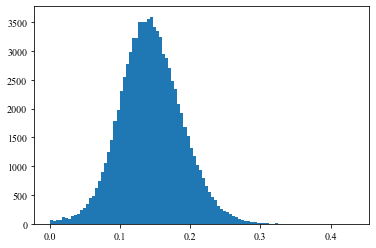

In [8]:
plt.hist(info_a['maxmin'],bins=100)
plt.show()

In [10]:
reg = smf.ols('maxmin_p ~ house_price+fees+mb+age+sex',
               data = info_a).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               maxmin_p   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     29.02
Date:                Mon, 25 May 2020   Prob (F-statistic):           2.80e-29
Time:                        19:09:42   Log-Likelihood:                -1148.4
No. Observations:                7849   AIC:                             2309.
Df Residuals:                    7843   BIC:                             2351.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5989      0.016     37.271      0.000       0.567       0.630
house_price -1.739e-07   2.14e-07     -0.813      0.416   -5.93e-07    2.45e-07
fees            0.0001   3.94e-05      3.221      0.001    4.97e-05       0.000
mb              0.0411      0.004      9.391      0.000       0.033       0.050
age            -0.0025      0.000     -6.059      0.000      -0.003      -0.002
sex            -0.0117      0.007     -1.692      0.091      -0.025       0.002
==============================================================================
Omnibus:                     3640.933   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.452
Skew:                          -0.139   Prob(JB):                     4.57e-95
Kurtosis:                       1.881   Cond. No.                     1.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
info_a['fees1']=info_a['fees'].apply(lambda x: np.log(x+0.1))
info_a['terminal_price1']=info_a['terminal_price'].apply(lambda x: np.log(x+0.1))
info_a['house_price1']=info_a['house_price'].apply(lambda x: np.log(x+0.1))

In [122]:
for column in ['fees1','house_price1','sex','age','mb']:
    mean_val = info_a[column].mean()
    info_a[column].fillna(mean_val, inplace=True)

In [123]:
info_a['mb']=info_a['mb'].apply(lambda x: 0 if x==2 else x)

In [124]:
reg = smf.ols('radius ~ house_price1+fees1+age+sex+mb',
               data = info_a).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 radius   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     652.6
Date:                Mon, 25 May 2020   Prob (F-statistic):               0.00
Time:                        12:10:37   Log-Likelihood:                 41627.
No. Observations:               99494   AIC:                        -8.324e+04
Df Residuals:                   99488   BIC:                        -8.319e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3846      0.016     23.596      0.000       0.353       0.417
house_price1     0.0044      0.002      2.843      0.004       0.001       0.007
fees1            0.0152      0.001     23.978      0.000       0.014       0.016
age             -0.0022   9.73e-05    -22.636      0.000      -0.002      -0.002
sex             -0.0207      0.001    -15.740      0.000      -0.023      -0.018
mb               0.0451      0.001     38.353      0.000       0.043       0.047
==============================================================================
Omnibus:                    34745.539   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90026.279
Skew:                          -1.982   Prob(JB):                         0.00
Kurtosis:                       5.449   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
reg = smf.ols('maxmin_p ~ house_price1+fees1+mb+age+sex',
               data = info_a).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               maxmin_p   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     139.0
Date:                Thu, 30 Apr 2020   Prob (F-statistic):          2.15e-147
Time:                        18:12:45   Log-Likelihood:                -15012.
No. Observations:               87022   AIC:                         3.004e+04
Df Residuals:                   87016   BIC:                         3.009e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3937      0.031     12.868      0.000       0.334       0.454
house_price1     0.0077      0.003      2.674      0.007       0.002       0.013
fees1            0.0266      0.001     21.950      0.000       0.024       0.029
mb               0.0021      0.001      1.762      0.078      -0.000       0.005
age             -0.0024      0.000    -12.665      0.000      -0.003      -0.002
sex              0.0102      0.003      3.961      0.000       0.005       0.015
==============================================================================
Omnibus:                    69139.337   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5116.558
Skew:                           0.002   Prob(JB):                         0.00
Kurtosis:                       1.812   Cond. No.                     1.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
reg = smf.ols('maxmin_p ~ house_price1+fees1+mb+age+sex+radius_p',
               data = info_a).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               maxmin_p   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     464.5
Date:                Thu, 30 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:14:10   Log-Likelihood:                -13986.
No. Observations:               87022   AIC:                         2.799e+04
Df Residuals:                   87015   BIC:                         2.805e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5555      0.030     18.245      0.000       0.496       0.615
house_price1     0.0029      0.003      1.015      0.310      -0.003       0.008
fees1            0.0258      0.001     21.532      0.000       0.023       0.028
mb              -0.0142      0.001    -11.348      0.000      -0.017      -0.012
age             -0.0023      0.000    -11.987      0.000      -0.003      -0.002
sex              0.0119      0.003      4.667      0.000       0.007       0.017
radius_p        -0.1820      0.004    -45.558      0.000      -0.190      -0.174
==============================================================================
Omnibus:                    42245.778   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4604.496
Skew:                          -0.040   Prob(JB):                         0.00
Kurtosis:                       1.876   Cond. No.                     1.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
info_a=pd.read_csv('/Users/xuhuimin/mobile/info_all.csv')

In [237]:
def game_min(x):
    a=[]
    for i in x:
        if eval(i)!=1:
            a.extend(eval(i))
        else:
            a.append(1)
    if np.min(a)==1:
        return np.nan
    else:
        return np.min(a)

In [238]:
info_a['game_min']=info_a.apply(lambda x: game_min(x[['game','video','music']]),axis=1)

In [239]:
def entertainment_rank(x):
    if x<=0.25:
        return 1
    if 0.25<x<=0.5:
        return 2
    if 0.5<x<=0.75:
        return 3
    if 0.75<x<=1:
        return 4
    if np.isnan(x)==True:
        return 5

In [241]:
info_a['game_min_p']=info_a['game_min'].rank(pct=True,method='first')

In [242]:
info_a['game_min_rank']=info_a['game_min_p'].apply(lambda x: entertainment_rank(x))

In [65]:
info_a1=info_a[info_a['game_min']!=1]

In [90]:
info_a['game_ratio']=info_a['game_min_p']//info['maxmin_p']

In [91]:
reg = smf.ols('maxmin_p ~ house_price1+fees1+mb+age+sex+game_ratio',
               data = info_a).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               maxmin_p   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     114.1
Date:                Tue, 05 May 2020   Prob (F-statistic):          4.48e-144
Time:                        17:01:04   Log-Likelihood:                -14628.
No. Observations:               84824   AIC:                         2.927e+04
Df Residuals:                   84817   BIC:                         2.934e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3972      0.031     12.807      0.000       0.336       0.458
house_price1     0.0073      0.003      2.495      0.013       0.002       0.013
fees1            0.0266      0.001     21.755      0.000       0.024       0.029
mb               0.0021      0.001      1.721      0.085      -0.000       0.005
age             -0.0024      0.000    -12.407      0.000      -0.003      -0.002
sex              0.0105      0.003      4.025      0.000       0.005       0.016
game_ratio   -1.909e-05    8.2e-06     -2.328      0.020   -3.52e-05   -3.01e-06
==============================================================================
Omnibus:                    67776.249   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4992.775
Skew:                           0.001   Prob(JB):                         0.00
Kurtosis:                       1.811   Cond. No.                     3.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
info_a['fees1']=info_a['fees'].apply(lambda x: np.log(x+0.1))
info_a['terminal_price1']=info_a['terminal_price'].apply(lambda x: np.log(x+0.1))
info_a['house_price1']=info_a['house_price'].apply(lambda x: np.log(x+0.1))

In [16]:
for column in ['terminal_price1','fees1','house_price1']:
    mean_val = info_a[column].mean()
    info_a[column].fillna(mean_val, inplace=True)

In [18]:
reg = smf.ols('game_min ~ house_price1+sex+age+mb+fees1',
               data = info_a).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               game_min   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     80.92
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           1.70e-84
Time:                        21:32:39   Log-Likelihood:                 2591.3
No. Observations:               22964   AIC:                            -5171.
Df Residuals:                   22958   BIC:                            -5122.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6008      0.043     13.861      0.000       0.516       0.686
house_price1     0.0262      0.004      6.365      0.000       0.018       0.034
sex             -0.0121      0.003     -3.691      0.000      -0.019      -0.006
age              0.0015      0.000      9.344      0.000       0.001       0.002
mb               0.0248      0.002     14.236      0.000       0.021       0.028
fees1           -0.0108      0.002     -6.056      0.000      -0.014      -0.007
==============================================================================
Omnibus:                     4561.704   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7957.187
Skew:                          -1.438   Prob(JB):                         0.00
Kurtosis:                       3.202   Cond. No.                     1.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### regression-class

In [18]:
info=pd.read_csv('info_all.csv')

In [4]:
def entertainment(x,y,z):
    a=[]
    for i in [x,y,z]:
        if eval(i)==1:
            pass
        else:
            a.extend(eval(i))
        return np.sqrt(np.sum([i**2/len(a) for i in a]))

info['entertainment']=info.apply(lambda row: entertainment(row.romance, row.fantasy, row.fiction), axis=1)

In [5]:
info.columns

Index(['tag', 'history', 'romance', 'fiction', 'computer_science', 'social_science', 'non_native_lang', 'children_book', 'literature_art', 'fantasy', 'life', 'economic_management', 'business', 'science_tech', 'magazine', 'love_sex', 'uid', 'mb', 'pricesum', 'all', 'fee', 'entertainment', 'science', 'literature', 'business_', 'life_', 'radius', 'distance1'], dtype='object')

In [10]:
part_read=info[[ 'mb', 'pricesum','fee','radius', 'entertainment']]

In [12]:
part_read.to_csv('./part_read.csv',index=False)

In [82]:
info['entertainment'].mean()

0.3278970714753027

In [83]:
info['entertainment'].std()

0.16990970398986566

In [6]:
reg = smf.ols('radius ~ mb+fee+entertainment',
               data = info).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 radius   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                 1.078e+04
Date:                Sun, 26 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:02:01   Log-Likelihood:             1.9772e+05
No. Observations:              158258   AIC:                        -3.954e+05
Df Residuals:                  158254   BIC:                        -3.954e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3598      0.000   1120.309      0.000       0.359       0.360
mb                0.0092      0.000     22.166      0.000       0.008       0.010
fee               0.0101      0.000     24.201      0.000       0.009       0.011
entertainment     0.1505      0.001    174.335      0.000       0.149       0.152
==============================================================================
Omnibus:                   119700.259   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2145518.595
Skew:                          -3.600   Prob(JB):                         0.00
Kurtosis:                      19.539   Cond. No.                         5.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
info_a=pd.read_csv('/Users/xuhuimin/mobile/info_all.csv')

In [88]:
def entertainment(x,y,z):
    a=[]
    for i in [x,y,z]:
        if eval(i)==1:
            pass
        else:
            a.extend(eval(i))
        return np.sqrt(np.sum([i**2/len(a) for i in a]))
info_a['entertainment']=info_a.apply(lambda row: entertainment(row.video, row.music, row.game), axis=1)

In [9]:
# def part(x,y):
#     for i in range(y):
#         if i/10<x<=(i+1)/10:
#             return i
#             break
# info_a['rank_h']=info_a['house_price'].rank(method='min',pct=True)
# info_a['rank_t']=info_a['terminal_price'].rank(method='min',pct=True)
# info_a['part_h']=info_a['rank_h'].apply(lambda x: part(x,5))
# info_a['part_t']=info_a['rank_t'].apply(lambda x: part(x,5))

In [55]:
info_a['house_price1']=info_a['house_price'].apply(lambda x: np.log(x+0.01))
# info_a['terminal_price1']=info_a['terminal_price'].apply(lambda x: np.log(x))
# info_a['house_price1']=info_a['part_h'].values
# info_a['terminal_price1']=info_a['part_t'].values

In [56]:
info_a['fees1']=info_a['fees'].apply(lambda x: np.log(x+0.01))

In [34]:
# for column in ['house_price1','age','fees1']: #'terminal_price1',
#     mean_val = info_a[column].mean()
#     info_a[column].fillna(mean_val, inplace=True)

In [42]:
info_a1=info_a[info_a['mb']!=2]

In [59]:
info_a['fees1'].mean()

3.7590020001532904

In [57]:
reg = smf.ols('radius ~ house_price1+fees1+sex+age+mb',
               data = info_a1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 radius   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     51.91
Date:                Mon, 11 May 2020   Prob (F-statistic):           5.17e-53
Time:                        17:27:38   Log-Likelihood:                 9620.7
No. Observations:                6808   AIC:                        -1.923e+04
Df Residuals:                    6802   BIC:                        -1.919e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4935      0.005    105.515      0.000       0.484       0.503
house_price1     0.0007      0.000      1.371      0.170      -0.000       0.002
fees1            0.0014      0.001      1.832      0.067   -9.65e-05       0.003
sex          -6.797e-05      0.002     -0.044      0.965      -0.003       0.003
age             -0.0005   9.49e-05     -5.024      0.000      -0.001      -0.000
mb              -0.0230      0.001    -15.589      0.000      -0.026      -0.020
==============================================================================
Omnibus:                     8341.164   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           847202.237
Skew:                          -6.809   Prob(JB):                         0.00
Kurtosis:                      55.926   Cond. No.                         215.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
reg = smf.ols('radius ~ house_price1+fees1+sex+age+entertainment',
               data = info_a).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 radius   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     423.9
Date:                Sun, 26 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:21:30   Log-Likelihood:                 9661.9
No. Observations:                8090   AIC:                        -1.931e+04
Df Residuals:                    8084   BIC:                        -1.927e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3778      0.006     65.391      0.000       0.366       0.389
house_price1      0.0015      0.001      2.743      0.006       0.000       0.003
fees1             0.0019      0.001      2.279      0.023       0.000       0.004
sex               0.0019      0.002      1.049      0.294      -0.002       0.005
age              -0.0006      0.000     -5.283      0.000      -0.001      -0.000
entertainment     0.2234      0.005     44.092      0.000       0.213       0.233
==============================================================================
Omnibus:                     5598.569   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89806.353
Skew:                          -3.172   Prob(JB):                         0.00
Kurtosis:                      18.039   Cond. No.                         262.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### regression-entertainment

In [54]:
def entertainment(x,y,z):
    a=[]
    for i in [x,y,z]:
        if eval(i)==1:
            return 0.6
        else:
            a.extend(eval(i))
        return np.sqrt(np.sum([i**2/len(a) for i in a]))

In [44]:
info['entertainment_d']=info.apply(lambda row: entertainment(row.romance, row.fantasy, row.fiction), axis=1)

In [46]:
info['entertainment_d'].mean()

0.48276604683119134

In [47]:
info['entertainment_d'].std()

0.0904746192667392

In [51]:
info_a['entertainment_d']=info_a.apply(lambda row: entertainment(row.video, row.music, row.game), axis=1)

In [53]:
info_a['entertainment_d'].mean()

0.5143973687142395

In [54]:
info_a['entertainment_d'].std()

0.05606513893947376

In [45]:
reg = smf.ols('entertainment ~ fee+mb', #life_+business_+literature
               data = info).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          entertainment   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     504.3
Date:                Sun, 26 Jan 2020   Prob (F-statistic):          4.77e-219
Time:                        20:24:03   Log-Likelihood:                 28592.
No. Observations:              158258   AIC:                        -5.718e+04
Df Residuals:                  158255   BIC:                        -5.715e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2647      0.001    402.797      0.000       0.263       0.266
fee            0.0160      0.001     13.086      0.000       0.014       0.018
mb             0.0362      0.001     30.149      0.000       0.034       0.039
==============================================================================
Omnibus:                     7934.905   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25018.023
Skew:                          -0.591   Prob(JB):                         0.00
Kurtosis:                       1.451   Cond. No.                         2.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
info_a=pd.read_csv('/Users/xuhuimin/mobile/info_all.csv')

In [100]:
len(info)

158258

In [95]:
info_a['house_price1']=info_a['house_price'].apply(lambda x:  x/10000)
# info_a['terminal_price1']=info_a['terminal_price'].apply(lambda x:  x/1000)
info_a['fees1']=info_a['fees'].apply(lambda x: np.log(x))

In [96]:
for column in ['house_price1','age','fees1']:
    mean_val = info_a[column].mean()
    info_a[column].fillna(mean_val, inplace=True)

In [97]:
info_a[np.isinf(info_a['fees1'])] = np.nan

In [98]:
reg = smf.ols('entertainmemt_ ~ house_price1+fees1+sex+age',
               data = info_a).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         entertainmemt_   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     460.5
Date:                Sun, 26 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:26:53   Log-Likelihood:                 19301.
No. Observations:               58715   AIC:                        -3.859e+04
Df Residuals:                   58710   BIC:                        -3.855e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3937      0.007     60.522      0.000       0.381       0.406
house_price1     0.0022      0.001      3.271      0.001       0.001       0.004
fees1            0.0273      0.001     36.796      0.000       0.026       0.029
sex              0.0071      0.002      3.806      0.000       0.003       0.011
age             -0.0031      0.000    -19.018      0.000      -0.003      -0.003
==============================================================================
Omnibus:                    15684.773   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31672.404
Skew:                          -1.683   Prob(JB):                         0.00
Kurtosis:                       4.273   Cond. No.                         297.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### visulization

In [331]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

In [332]:
model_dm=Doc2Vec.load('doc2vec1_case')

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/gensim/models/doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [333]:
keys=['小说','原创女频','原创男频','文学艺术','成功励志','社会科学','历史传记','经济管理','生活','亲子少儿','期刊','计算机','科技','两性情感','外文']

In [334]:
names=['Fiction', 'Romance', 'Fantasy', 'Literature & Art', 'Business & Leadership', 'Social Science', 'History & Biographies', 'Economics & Management', 'Family Life', "Children's books", 'Magazines', 'Computer Science', 'Science & Technology', 'Love, Sex & Marriage', 'Non-native Languages']

In [335]:
embedding_clusters_gif = []
word_clusters_gif = []
for word in keys:
    print(word)
    embeddings = []
    words = []
    for similar_word, _ in model_dm.most_similar(word, topn=20):
        words.append(similar_word)
        embeddings.append(model_dm[similar_word])
    embedding_clusters_gif.append(embeddings)
    word_clusters_gif.append(words)

小说
原创女频
原创男频
文学艺术
成功励志
社会科学
历史传记
经济管理
生活
亲子少儿
期刊
计算机
科技
两性情感
外文


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


In [336]:
person_clusters_gif = []
for i in range(100):
    person_clusters_gif.append(model_dm.docvecs[i])

In [337]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters_gif = np.array(embedding_clusters_gif)
n, m, k = embedding_clusters_gif.shape

In [338]:
embedding_clusters_gif.shape

(15, 20, 300)

In [339]:
import matplotlib.patheffects as PathEffects
import matplotlib.cm as cm
% matplotlib inline
import tempfile
import imageio
import shutil
import os
from mpl_toolkits.mplot3d import Axes3D

In [340]:
# tsne_model_en_2d_gif = TSNE(perplexity=100, n_components=2)

In [341]:
tsne_wp_3d = TSNE(perplexity=30, n_components=3, init='pca',random_state=100)

In [342]:
# embeddings_en_2d_gif = np.array(tsne_model_en_2d_gif.fit_transform(embedding_clusters_gif.reshape(n * m, k))).reshape(n, m, 2)


In [343]:
embeddings_wp_3d = np.array(tsne_wp_3d.fit_transform(embedding_clusters_gif.reshape(n * m, k))).reshape(n, m, 3)


In [357]:
persons=tsne_wp_3d.fit_transform(person_clusters_gif)

In [345]:
# embeddings_en_2d_gif.shape

In [346]:
embeddings_wp_3d.shape

(15, 20, 3)

In [347]:
m=['o','v','^','<','>','1','2','3','4','s','p','*','h','H','+','x','D','d','|','_']

In [348]:
len(m)

20

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

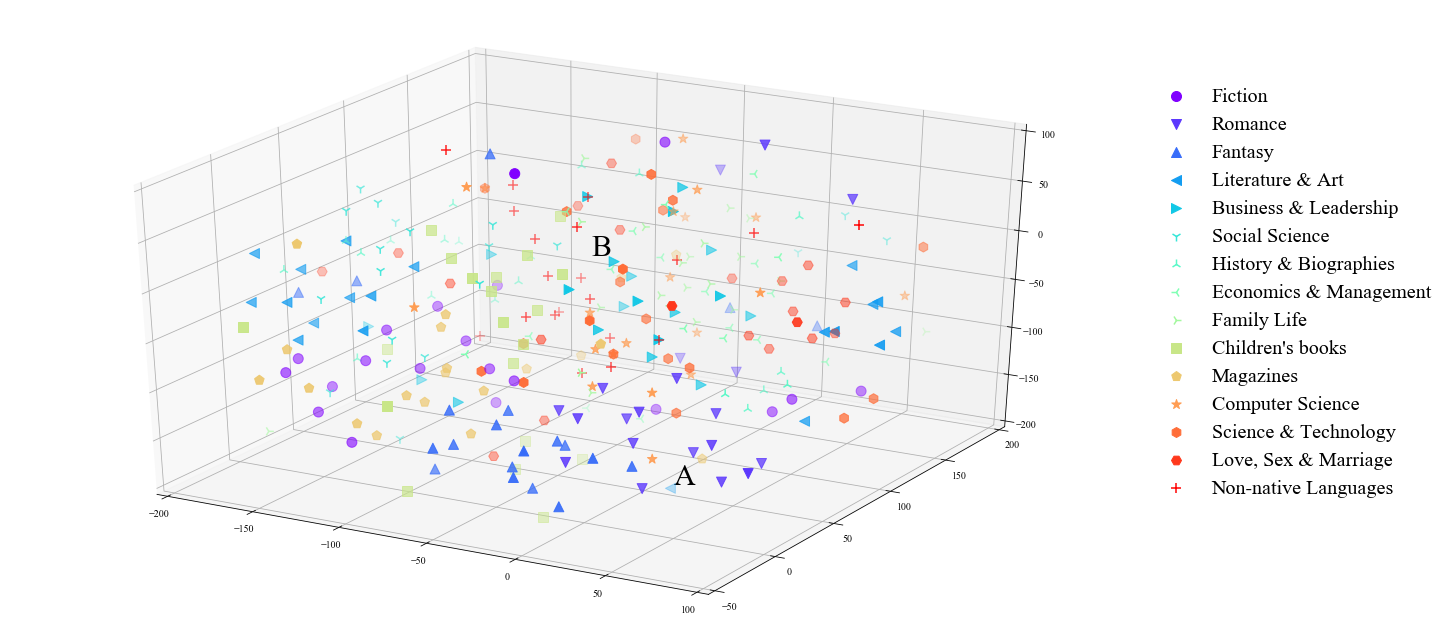

In [391]:
fig=plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')
colors = cm.rainbow(np.linspace(0, 1, len(embeddings_wp_3d)))
i = 0
for embeddings, color in zip(embeddings_wp_3d, colors):
    x = embeddings[:, 0]
    y = embeddings[:, 1]
    z = embeddings[:, 2]
    ax.scatter(x, y, z, c=color,label=names[i],marker=m[i], s=10**2)
    i += 1
ax.text(50, 0, -150, 'A', color='k',size=30)
ax.text(-100, 150, -50, 'B', color='k',size=30)
ax.legend(fontsize=20,loc='left', bbox_to_anchor=(1, 0.9),frameon=False)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# plt.axis('off')
ax.set_xlim([-200,100])
ax.set_ylim([-50,200])
ax.set_zlim([-200,100])
plt.tight_layout()
plt.savefig('./picture/visualization_cube.png',dpi=300)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

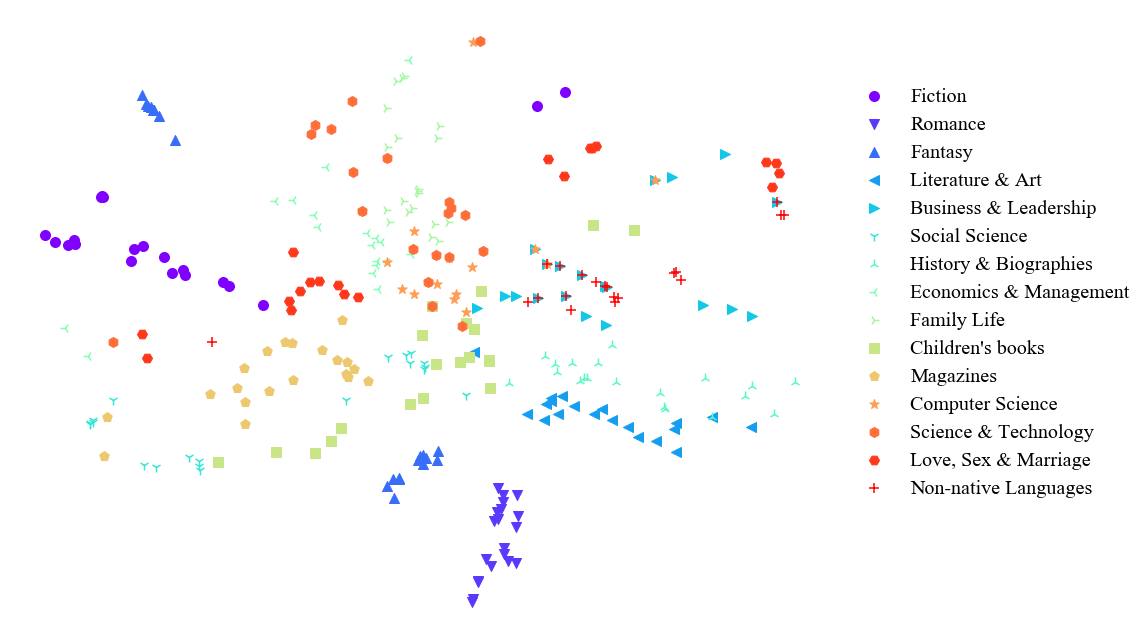

In [312]:
# fig=plt.figure(figsize=(16, 9))
# ax=fig.add_subplot(1,1,1)
# colors = cm.rainbow(np.linspace(0, 1, len(embeddings_en_2d_gif)))
# i = 0
# for embeddings, color in zip(embeddings_en_2d_gif, colors):
#     x = embeddings[:, 0]
#     y = embeddings[:, 1]
#     plt.scatter(x, y, c=color,label=names[i],marker=m[i],s=10**2)
#     i += 1
# plt.legend(fontsize=20,loc='left', bbox_to_anchor=(1, 0.9),frameon=False)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# plt.axis('off')
# plt.xticks([])
# plt.yticks([])
# plt.tight_layout()
# plt.savefig('./picture/visualization.png',dpi=300)


### preference

In [38]:
all_userbooks_info=pd.read_csv('./all_userbooks_info.csv')

In [39]:
all_userbooks_info.platform[all_userbooks_info.platform != 3] ="high social class"
all_userbooks_info.platform[all_userbooks_info.platform == 3] ="low social class"

# 怎样算读了？大于1分钟
all_userbooks_info = all_userbooks_info[all_userbooks_info['duration'] >= 60000]

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
android_userlist_df = all_userbooks_info[all_userbooks_info['platform'] == 'low social class'][['uid']].drop_duplicates()
ios_userlist_df = all_userbooks_info[all_userbooks_info['platform'] == 'high social class'][['uid']].drop_duplicates()

In [91]:
sample_size = 2000
category_platform_usercount_df_10times = pd.DataFrame()

for sample_time in np.arange(10):
    android_userlist_sample_df = android_userlist_df.sample(sample_size)
    ios_userlist_sample_df = ios_userlist_df.sample(sample_size)
    
    android_sample_df = all_userbooks_info.merge(android_userlist_sample_df, on='uid')
    ios_sample_df = all_userbooks_info.merge(ios_userlist_sample_df, on='uid')

    category_platform_usercount_df = android_sample_df.append(ios_sample_df)\
                                                  .groupby(['category', 'platform']\
                                                           , as_index=True)\
                                                  ['uid'].nunique().reset_index()
    category_platform_usercount_df_10times = category_platform_usercount_df_10times.append(\
                                                            category_platform_usercount_df, ignore_index=True)

In [92]:
category_platform_usercount_df_10times['uid']=category_platform_usercount_df_10times['uid'].apply(lambda x: x/2000)

In [46]:
orderlist = ['原创女频','原创男频','小说','文学艺术','历史传记','成功励志','经济管理','社会科学',\
             '生活','亲子少儿','科技','两性情感','计算机','期刊','外文']
orderlistEnglish = ['Romance', 'Fantasy', 'Fiction', 'Literature & Art',\
                    'Historical & Biographical', 'Business & Leadership',\
                    'Economics & Manager', 'Social Science', 'Family Life', 'Children\'s Books',\
                    'Science & Technology', 'Love, Sex and Marrige', 'Computer Science',  \
                    'Magazines','Non-native Languages']
diction=dict(zip(orderlist,orderlistEnglish))

In [47]:
category_platform_usercount_df_10times.head()

,category,platform,uid
0,两性情感,high social class,0.0665
1,两性情感,low social class,0.0595
2,亲子少儿,high social class,0.0725
3,亲子少儿,low social class,0.0610
4,历史传记,high social class,0.1550


In [48]:
c=category_platform_usercount_df_10times[category_platform_usercount_df_10times['platform']=='low social class'].groupby(['category'])['uid'].mean().keys()
d=category_platform_usercount_df_10times[category_platform_usercount_df_10times['platform']=='low social class'].groupby(['category'])['uid'].mean().values
e=[i[0] for i in sorted(list(zip(c,d)),key=lambda x: x[1],reverse=True)]

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


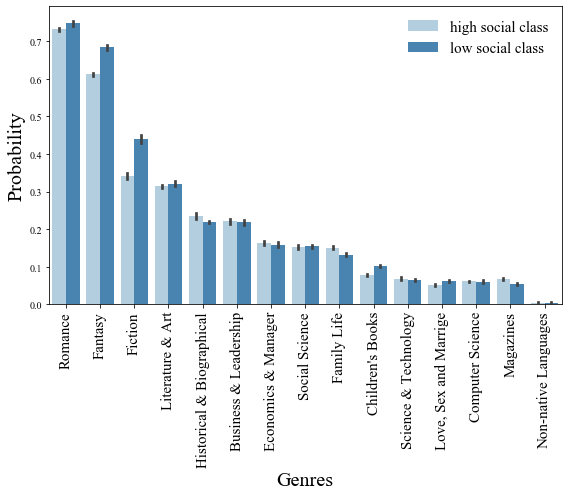

In [49]:
# 把Android和iOS的差异——排个序
fig = plt.figure(figsize=(8 ,7))
# ax.plot(androidmean, 'o-', label='Android')
# ax.plot(iosmean, 'v-', label='iOS')


ax = sns.barplot(x='category', y='uid', hue='platform', data=category_platform_usercount_df_10times\
                 , palette='Blues', estimator=np.mean, ci=95, order=e)

ax.set_xticklabels(orderlistEnglish, rotation=90, fontsize=15)
ax.set_ylabel('Probability', fontsize=20)
ax.set_xlabel('Genres', fontsize=20)
plt.legend(fontsize=15,frameon=False)
plt.tight_layout()
plt.savefig('./picture/preference.jpg',dpi=300)

### cluster

In [53]:
m1=['News', 'Video', 'Communication', 'Web Browsing', 'Search', 'Music', 'Weather Service', 'Software Management', 'Forum', 'Shopping', 'Navigation', 'Reading', 'Game', 'Payment', 'Travel', 'Mail', 'Real State', 'Recruitment']
m2=['Fiction', 'Romance', 'Fantasy', 'Literature & Art', 'Business & Leadership', 'Social Science', 'History & Biographies', 'Economics & Management', 'Family Life', "Children's books", 'Magazines', 'Computer Science', 'Science & Technology', 'Love, Sex & Marriage', 'Non-native Languages']

In [58]:
df1 = pd.read_csv('app.csv')
df1.columns=m1
df1.head()

,News,Video,Communication,Web Browsing,Search,Music,Weather Service,Software Management,Forum,Shopping,Navigation,Reading,Game,Payment,Travel,Mail,Real State,Recruitment
0,NaN,0.496470,NaN,NaN,0.485798,0.482646,NaN,0.424135,NaN,0.524270,0.509868,0.456480,0.461867,0.479631,0.522053,NaN,0.448857,0.450787
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.395668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.438575,NaN,0.514494,0.448137,NaN,NaN,NaN,NaN
3,NaN,0.384229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.491553,0.507237,NaN,NaN,NaN
4,0.532586,0.524510,NaN,NaN,0.458286,NaN,NaN,NaN,NaN,0.529609,0.489240,0.518036,0.492177,0.487628,0.484425,NaN,NaN,0.495488


In [59]:
df1_cor = df1.corr()

In [60]:
df2 = pd.read_csv('reading.csv')
df2.columns=m2
df2.head()

,Fiction,Romance,Fantasy,Literature & Art,Business & Leadership,Social Science,History & Biographies,Economics & Management,Family Life,Children's books,Magazines,Computer Science,Science & Technology,"Love, Sex & Marriage",Non-native Languages
0,0.504397,0.484617,0.459507,NaN,0.513847,NaN,NaN,0.453889,0.486428,NaN,0.370291,NaN,NaN,0.42976,NaN
1,0.440707,0.419546,0.418886,NaN,0.431168,NaN,NaN,0.442844,0.448582,0.441877,0.434201,0.415283,NaN,NaN,NaN
2,NaN,0.442831,0.408255,NaN,NaN,NaN,NaN,NaN,0.408782,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.367280,0.362376,NaN,NaN,NaN,NaN,NaN,0.423357,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.427117,NaN,NaN,NaN,NaN,0.404501,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df2_cor = df2.corr()

In [80]:
sns.set(rc={'xtick.labelsize':20,
            'font.size':15,
            'ytick.labelsize':20})

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  after removing the cwd from sys.path.


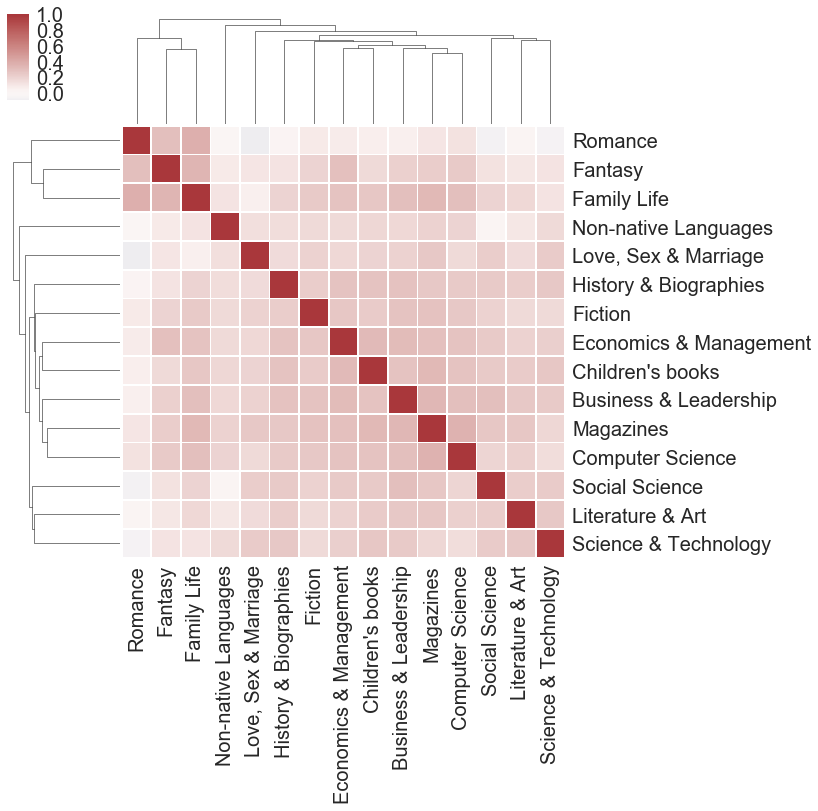

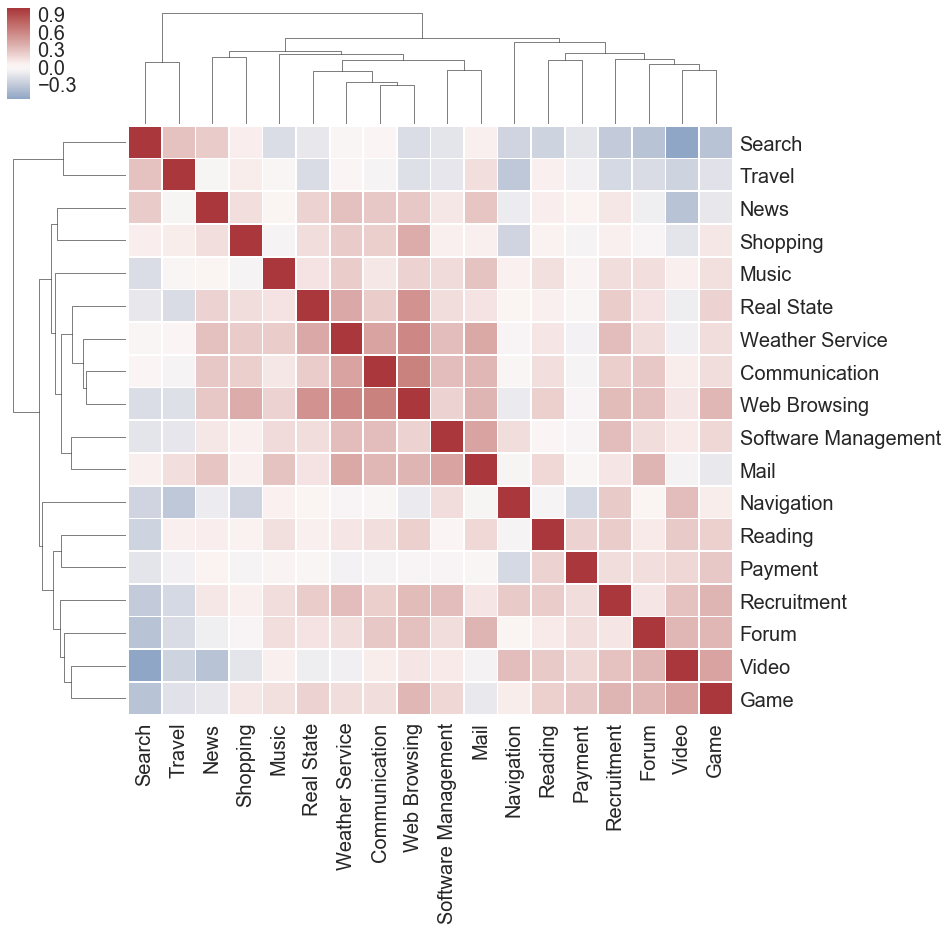

In [89]:
sns.clustermap(df1_cor, center=0, cmap="vlag",
               #row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))
plt.tight_layout()
plt.savefig('./picture/1.jpg',dpi=300)
plt.show()

In [90]:
ax=sns.clustermap(df2_cor, center=0, cmap="vlag",
               #row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))
plt.tight_layout()
plt.savefig('./picture/2.jpg',dpi=300)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  after removing the cwd from sys.path.


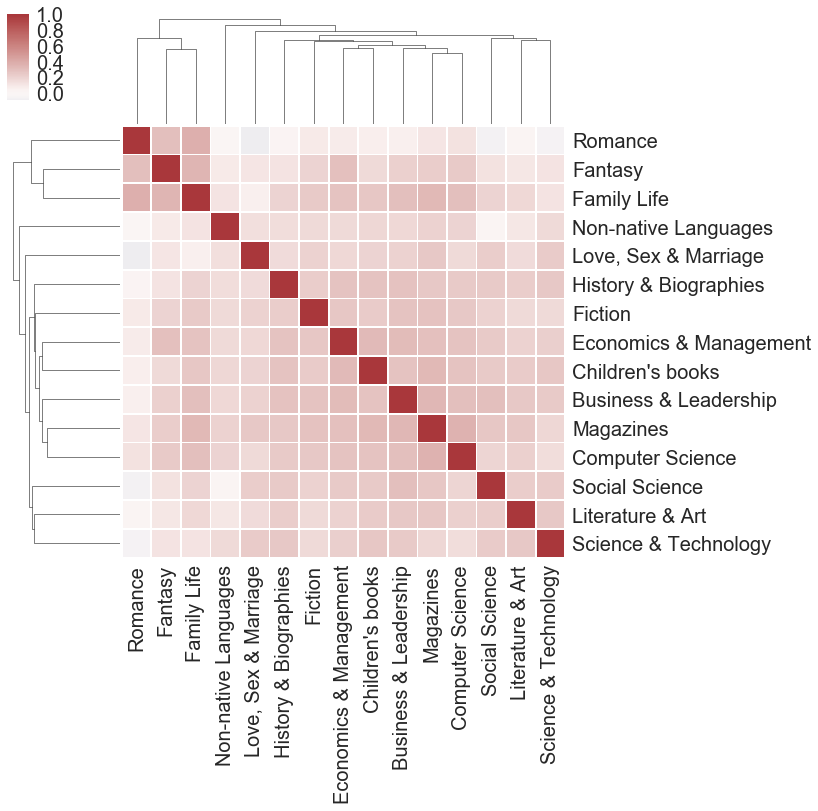

In [86]:
plt.show()